In [2]:
from flask import Flask, jsonify,request
import pickle
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import base64
from io import BytesIO
from rembg import remove
import cv2

In [2]:
MODEL_PATH="C:/Users/USUARIO/Desktop/Tesis/gitrepo/cocoa_dl_android/FlaskWebService2/src/"

In [3]:
Model_json = MODEL_PATH+"model.json"
#Model_weights = MODEL_PATH+"model.h5"

model_json = open(Model_json, 'r')
loaded_model_json = model_json.read()
model_json.close()
# model = tf.keras.models.model_from_json(loaded_model_json)
# model.load_weights(Model_weights)

models_path=["model_fito.h5","model_mazorca_negra.h5","model_monoliosis_ef.h5","model_monoliosis_intermedia_sf.h5"]
models=[]

for path in models_path:
    Model_weights = MODEL_PATH+path
    tmp= tf.keras.models.model_from_json(loaded_model_json)
    tmp.load_weights(Model_weights)
    models.append(tmp)

In [4]:
string="""
iVBORw0KGgoAAAANSUhEUgAAAHgAAAB4CAIAAAC2BqGFAAAAAXNSR0IArs4c6QAAAANzQklUCAgI
2+FP4AAAIABJREFUeJx9vVuPJLmSJvaZkfRLRGZWVXd1987RmVlpsdLLQpAAXV5WgABBgB70/18k
DITVSJozfbq6ujIjwi8kzfRgJJ0RWWcc1dmRke500mj3G+l//1/+47quAP7d3//y0+cXAKqqqjHG
4EfnnH0D4Pcvf2UXnl/OwfnL27eUknYX6mW/ikjcc845q5znEzvsUUXBzNu2DT78/MtP3vN8eiIi
lfT1r39RJQBESt45uN9++23fdwDMTETMzMzekXPOflUwEbkhfPz0k5LYnP/5n/7f6XT+6aefRJWA
8hMZosxeRIjI5knMOWcmAhFUv3z5st6uRI5IbRVEREQAE5FqBkCOIQomCL18+vhv/4t/v6zXL//y
LwAur297iqQAYA+qlhmACaKeSD+8PDnHtgBVZWYRGYYhJwnTyApFloxhGMhx3LN4cc7FGEUkJ80q
KUlKKee8b/F2u7F312VT1cF7Zh5+DiOP63pdt/3jx4/jOErKIiICEXHOkWOAGwQAVqZxHJm0zRvK
qipKmpUIrEokAFg9IACgrEKszMwAiBVCBAGYFFqBC1WDdc5ZVVHfmtIOcEMXR6QFXgK4Avc6DoAQ
QowxbdswDM45STm+vaIiXMM8IgKRQv1//B/+AxFd3m6qylx2kskTq/dKosRM8GDxQ4jbLp7fvi7n
02hz/e3Lq4io6hZ3G32PCTExEEX2JGPQPeVxxODd719vIYTz+VxJgEWTIzLQlGkBBR1UU9acs/cD
EQHZOdewmwragJlBDsjMrMgZysyqSmBRARMEAAOqmg2UNj5UbW8N81KSMiIAQAAC20YogchV8iBV
MFEIIaWUs/gQCHDBA0JUxpdjR0AKEJV5z/PsnBuGIYTgvfeBnXPTNO37LiIgcZ6GYRCR9Xq73W7r
FgE45/Z9jzEadu97yjkbjRORZ845bzGvy0ZE3vt5nkXkjz/+SJJFxBZpHyqd3sEaop5dSklEDHwi
IiI555zzsm9J8rEeewQwdveAWYCBWxqvIyLm8t6cs2axmx84oRE+EREdeE1E3gfRZJM3BLfByhJE
bT5tVt7+5gNfr2kYvXOuvU9EfGDRxPCqOgzD559/UtW45y9fvnhPxByzGIuvq3LM5WXMPJDuKV2X
1dafY3LEy/UGoAA6izo1ftU4IyoHI8dENAYG4IiZGUykACspu+ByzpJtb6hBh5kVoIpN2pEzsxPJ
9o2xBSKww7Yme6MqmJ3xogpWFs1gZbjyFAkgbghlgwEQhRCYfc65wZrtR0GCSoOqaojQxI5h0DAM
cS8zY2aCI6JxHF9eXrz3BHx8eT7Ei6GGKjM7Yu+9934ex33fBYX1xxjHcfz8+fM4ju1Be3ubol3e
+xBCCMF79p7ZASQ5ZxHJuaA2ETlSRS64k6UJMapsocdre0Qrm1aCAlCO295TVV2Obb808Vh2CwRg
CBNV0OPd1VOnLbHyLCI/DimlnoRt8eM4ppT6x1R1Op8M90/n+fn5uX8qpQQIWInsHxmHUVVyHGPM
KgCmaQohiEiT1A1GXAk355xSijGnJDFJygcQ7XIM8o6U7e1GxwWIjfKJAGkkrJob0ZAWxLeFt80A
uBOMTOQq91AiUmIi572vwFDqdvE9oMui7BdHNA0F88sanAPgnBun0ObR+C8zfBht25+fz+M49nJ2
3RMAUjCI2VS6qARDaoimPW7bpqrDNIrN1YV7bDoIy9XrkJmKrJJzzomMS6sQSA7K6zaeiJoMNMCZ
JOxRuAe0bUzbJIMi0YG8pAjjoPcjNJTvKaYM6LiwDmYGMzlHlXs0NmK3+mHISZkZJACIlYEQAmCg
5I8fX5oIsnfHWPbMEXumPUaIMnPMklXWfRORlJJzbp7ONmbBOyahQxU10ZeSCUDNWZNoVjjynp1z
VKmbVEgkCYrG9rBaAFkEgJgmUbSusnMdoAuj6FBSwJURVZ47hPGQmWWog+n172U2HVUZzErEzI5o
GoacDzlusGPmp9MpxohuLPsrVYV0GIZPnz40fHdEqhqzlF+dSykDmMZBVdc9xRiLURNjSokUIGcj
e2JX35OzEjlmb8ZKj+M9yhuS2uWIG5do8Gq6jZG5aXXU8e62aiJnZpBhIgBSNiWyB98wjUSEqnKg
Ar0zc1DUeSLbJ8+Aitg7vffXyxJCaPtpjFiAaZqKcVFJg4M3pF5jBnA6nWKM1+u1bZOIJFFHUFWN
mlW89/M4bDGt6y4ibPqyFInP7FVVmUSUicg7e90DppBCIWB/sNgOakTkqgKDqtv0oLf/iQgB0Kzg
HKOpj4a/hVkAjMYERJAJzCB74zzP7A8bEqqScw/cQ0FkIoAAb2ZuIVXWnqM3jGDVYR4ul8vJ+wZo
VQ3DICI//vjDb799cY5fXl72fTfTvL11nKfgvAseYO/5dDr9eJ6HYcw5O2bNogHQO7lhl6k9bSYG
spjz0+nEfKgojXGjE0dUTR7gQZUGAVp1MlMb6oRtS44Fdis9QAxACeN8JlIipyJQAum2bT3Q2q4X
sWR6tFEWEQFstrX33r5UVSgLgZm8PySAjRhCWJfl+fn07dvrtm3M/PHjx33fnePgfQiBmYn56elp
GL0jVsKf/sT2rj3mZEawqFID9J1yZraWUb+p57MP67qGcRyLJVYIUwGtCh8agA5cETPnyl6akWdv
IUkpMbMRA5ighoaP2HZ8JkzTJJpFUqUSSntUsyGZGt4UG5UIqh4d0YnqNE3rdjMjsIyicCDNMk3T
7fI6z3PV7XUYBiL69u3bNA4ieRpH5z0zE6tnZ8smxzlpCIEUStBckG4Y/bbGPeZhamvQph4Y1+qx
teGs95xjzMzeF37dkJcqo38HI0I1zZsEo0r1Ke2NMszqA4FARcum8mWjjGmawKRZNRcQkSKl5IhN
iqPCp2wqqmXYiJTIKasZHQ2nwAAUSp7hvTd/k0mhYfAueBNHMcZvX/8wrm1eK3sBM48jxxjncSLH
cA0oNDyFLe5xz8PoDbYFC1Lu0eHQr5lDcN4PZQ+cSdrDMIHkBmiDad08BqqQb2snIiIRVHNOmOvW
qoLgiHPhJ3fasaEaVJsDQCHNBHnQP2w0IvJ4dzFzjNFARoWVA0QiMo7hdt2naTLkUqVxHO2hEBzk
Q855miYzndulmnPW2+0W2JlC1ShrOo3ruu9b4uqfINFM4LJDo93mve9V6SK46lsai6g4dHe1rSr7
YWo1mbtImchgxFWHIyKwQlAsGiKtSG1DjdNc1BgxhwHinu4J6IBkk8be/m/8i0kVOk3TsjTdw4QH
k4OIMDuQ2DaYAGkuAiL39HK+XG6npzMVO80oS5gHQIZhWJarWYOSVAk5ZxUwc9yjaQGACDmpJPn0
9MSFYtD/bCisqkSOICCBsiA3b2uldK482chIm6ZCQEYm5bRHM/+aa6L5bA+0dKRZjH9M5xMRmUZo
/PxOoagTc84VW0yhUO8PvkFKpCLe+5y0k7xFdBKRiMzzfLvdXl5eiEgV1bQxVY1Pp9OyLE9PT/am
yhMFgPd+HOfr9RpCYE8AiF1WAZx/4m2LSRjw8zQ226eYzDlrd9lMuNPh2k8TAI3htO+bvmvcCY2x
KKpzpjcji7aITl2TwnnYez5/+EiiN7OgCMSoNMEGojt9ic1tDvOaUxmwzj6EkHN2zlWrx2aptnbv
fUp7U7dNgtkLmCEi+74Pw9BkZsOmcQwpjTnugFOCiQ7NGUzD4Mfgr9dFwWTrBkREqmNPVA08D+6n
KKpiurqoEnExRgxSNmNTZtDRQpkYIedMzjMVIwhs6izA1JRFJXMKiaq+fPrEzFDZl2WPGwBxbt93
cGVQTEogZnIMQ2cCEbGSA1uAg0yIM/M0D/u+VwHFWldrmzZN0/W6oGP6vXUwjuFyuTS22P9VVc/n
M9hlvXP7ahZzFJ/P87Kt2xarKCNTLMzf4b33IXjzmHtf7ENQM8wO0DSEUu0tQFUFmyohgJCimSoN
nc05J7iXwygI+/LxBwA57XHfbZLbtplXpxjSIPt3jMm2ClJfTWdUwzqMY4qiRVUUwGbjbD9s/TFm
M2i5e9yuaRpeX/8ARLU6MA8qTufzLClDSASaTSdzNpSqnudp3bfrbc0i2TanMYFqTDdjwDkHJiVB
0bYOoaeV+RgG12Fyc/WZNpJzJpU28+booKoLN0cHM7N3Ty/Pqrosi2EVO5f2iOrEazvNzFxd5I6Y
XAVQ208iYsAR+cB3Xsd7eM3zeLvdGt9s0Ld3OOdEsK6r1piIQax9eHp5Nr7Wvmk8VJWenk4xp9u6
2buauklFwwuGzsXRIQqhNpPmDqP60+Bb+TIRNy8siEhSJueNY5Rp8J1TqX0A8PT8DMes2K5Xqqpb
iT0+2DWOBdrHak3OSs8B7PM4zyZMAZgXgqouoZoNpqaBGtr2wgfA6TS9vV1TKvDN9Wq3zefTvu/N
m3FHUsrPz2dV3bYYwjgMg/e+rdlG08qyBdoCItUauouNddhav1Kt2ghEpLGFOoeme4jpB/UtePn0
CUCMm7nYmNn87EolQH6wC1HIAUyY9+b9hJh5nEKKcsdJC6yZ2QM4nU63262iYe6YQ3lqGsbL61tT
JPtXGOqN89R7uo0zlTkoTtOYVS6XS8N6rXoy0YHCEDXPu4VdiMh+fZh5/2v/VxExNbkY0HfzLH4u
QMwpeP7wkRXrsuTqQtrXDZUvP3haGjDLWKpK5AQQoLnmVNWBOHhjRBWIuSJEBuAcqWqMW8l56BiL
De0Hp4Rex6z3FJQxPS+rgDVncxcXiSogJR7HkFWu10X7C5yzpiR7jNu+G4WZ/7FJtg6mck9wfaxL
1RIWYB4/E2Kul2NE5IiNrZ+fns0FtF6vtqLmPmtE2eQqOvOnTMxeyTUin1LKMW7btm2bIzUa6SHY
ewJPp8mg0OH73TRPp+l2W41htB1uXhQiMu9r2Xkp3gMRqSYGj+MYc7pcVhGkJPu+m4PQNkb10Jdb
FPEebcnuqazg0KNR/f3tkYcPJmya++XTz58BxBi3dbXH47b3hEIdN6dOnS8Yve/7uq7reluW67Yt
OUfVbIrnNA3btqnmDmfNmWCB92ITG9xMLameeDSIm9i8n0qHneDT6bRt0fRQHOK7YCgRzfO87fvb
9dJI0NQhkdRYSvvcCO4eP44pHW9RglDRfxVgKv8q0lRfvDKzC/750w9EtNwu5aWAuUaJqIQImtIN
UDVLTa1GP4NKdAeOVOvLhEbqZ2+BKBHM87yua7+AHqdMSQCw73vjDA+sE8Dz83OMsVk3ZBk8REQk
KQM4P8056evrpeez/QhEzuJYlblpB3Tpn+px0PwVDwM2FKmzzQB+/PwTlEVkuVzrxMQiQbZPB+bi
cD80MpUWBe/edCfWQggGo5QkJTEmQETDMM3zPE3TdDo1pLY59aCUpKo6juFyueUcc84twNzzfVU9
n88t10mzKHLbNsPr82kC8Ha5qWplGr1tIkYEPf2+23tuoDfNxJIX7vfgSMwAW8IRM/PLTz8BiOsS
94LFMe2mSbSIWieEymUbICJk0cYeNA97Po5hXfYQwul0Op1O0zT5YWDvj+RHkfP5vCwL3WuHqgop
ZpiJn8vlYCCNgBocVXWaJhMvhwKH4kLTLEo4Pc0i8nYp+TeWjFDByncbfIDvYV/NeCnbYAlWDShG
78YumknNoJdPn2y918ulDMrmimp8/FBs2tUDXVXYNJWGAs2ysJuqaYCWPcUQR9rQRKuNkPNhgOWs
+57WdV3XfVk2AOfzWURSKrKuF3eNw5phbeLXKE5zZ86Iapan80zA6+XNkKgLDsgwDM8vL3QfAHvg
2nUbkoE37fFOcaxKNIMcMSRDFJAfPv8MQHNs+oY91esF97tb87C6ixvIeiFWnydV9d7HmE1e25R6
Pm4fnp6e3t7e1nXdtrjvyVzJfhi95xCKSWL3QJQUkGJQyZE6pJqTOaDNK9aTlx7BNszzSHBvl1sT
vLaqeZ5/+eWX8/lssrqH7D2KSUMIC8bjHZNpPJqIpvPTeH4CcLtcSwTWubRHvZdGPTT6zw3iR0qO
VidO5QCmVdMwejPtq86mfeKP4UsIJWJtyRaqmlXhYH7eFvIZx/H19VVwtzYLIOxrvC7r29tbjPFy
uVheb33joTDZU+fTxOBvr5ceGVWzaEoxWjitUkyhG8MioyV7qeVO9kiHGsriEp1wRPTDTz/Z/bfL
a8NC87g98IrvonPjED7n7H0zSQ59oK5TnaO288Y8jPDrPhUH2NPT6Y+vl/PTqJro8AhKE3cF0Nu2
LbcQQs4a4yIWU025SRXvmXm63W6W3dtc4S3p1q75NNyW7e3tejpNB6KAFTlFCcOQky2yeWlAdFA9
gH5R/YZlFc+hSBHHzx8/E1Fa130ruZwpxo4+oPecijoN2rR+8z34lFIIzqIAam5CGMdJZjCpknNu
27Z5nlElm1poo1gfrEoujMRvORvLlpIbrioCZkLllU9Ppy+/fRtGH5x3zjkoM4nnXpoRUQhhWRaD
dV1SY75s0J9P4/WytEVWTwAAivvuB+eUUrKwoaEYVRw/7Lpehts4TT9T1V/+9Gcj8dvrmzl2LM7X
P2KZylrik2R5zAZcVGk5DINPKUGGsgJT0Q/VUmz9wzAst83yPw07Hnifvez5+fn19bVCpzEsYwLG
N0kVLx+ertfrGAYUJb0QvqpatMFyzgHsKc7TuWDHthCREuIW7XUWE9j2NITQHEmNFuO2Oz/4EPZt
Y6bKGkhFLTDQNJYWE+mBrqrs3Q+ff1Igx+12u1YuxjmWHWpRp5yzpVzZmM65EMIwDD2UvKqCHVFR
qh522CDlPV/ebiJiYrbSyyE6cs5EOgxeifaUgjPAFe31sPgs0WDw2+ZjTsMweOeZmcnDVT3C+4pc
XNxJWbKKEF2+fWNS7733xR+rqpfroqrjOKJIHq7+SzV+PYxj3NdOKhTSNjEQxuHnP/0phODd4L0n
xxZhYGZyQYCc99vlmmI0OMe0m/atmmPMD8BtUSftnGv23raqg8W0b3oRbCQzjqETPnf3iIAIL09P
r98u7jQyFxbUmKxtoQtjCOGX5x/IB8t8VSFFRpaU0r7v63UxMdUHns23+/T0nOLapm4y53yarrd1
3/dxGCzdosKUVEVjDCEM47ytqxFZnbOklMZ5+g//7X8/znNbfkFnZCgrsuaY1s0RPT1/fP3ja6Z8
u1yv16s5SWxLLLml8evGAKsWW4b1BojBO1UB9b4+iwob98A4hdvtFsIzc0mTUM3gQEBW5SpkXAhG
lf5ATIRxdj6EENwwdiy1UkxOOecUt23bbst2uMQqoAHLuoI454Ypb0svdhqsAQwhtKw2Yy+AxBjZ
uXGa9pK1VdKfn55f/sv/+r8pm93paqoKAkigMIarqsM0/fD5p9fXP3J+DSGM49jchA+Q/a4eUgAd
YwzBkeMWLm5QaIJxGPy3PzZVqq5Ix8wqQszIGTUATCLPz89vb2/GZE9PH6b5nGtWuMGrRx+JyVie
qgZ2wXOMxV/aAM0l8xUpJVGEcc7bRiTN1FLV0zxerouRMDFLzsYMiQjQnBITjdO0rasIAfryww//
+c9/6lVGxWHUqCiAuG6mL6uqIyLnnl4+TtPpj9+/bPtq0y5OXRFViNwZ9B2CQ1Xd//o//Xci4v1R
T2iLVKjpQzYNItr3PYTgnGVxUBMjPUaISBj8clsV8vTyaTw/3dUndZMQkbzHuK85J0gmZjA5EINy
FoWCajZimzdKEDGMI6lUnafAegh+WVa1MDlgIl31YF9KEsIA1R9//ruPP31GCeqrQtBQoV77dble
rpozNa6PIkfG05mJRLKUOg/7eWCziGaRnHJKKeWsgIi4/+1//h+3bQvhjoLIMjWIrAgSxcRAznkc
J+AAdI+e7TMHN50+jM9PuKOe4wZNOe57sphQiT85YjA55xjEkkVszOp/sCU0NHFhID3UQRt5GMK6
RVU1D/3jeyUzu1/+/A/z0wu6spTHJWSst9t6vSaJDE4iWmPS5V2qwzCO0wxVQE2ZaxCPKfe+mpw1
xhRj8pZOZ7jpzMdEEFVHxfNrnNCyvy5vt7awRjVc+Uab8fPLJ/JB5SiXPK4sOaW0x5R3MabBLCKO
VEvqaJhHEOty20o2UGXHIgAVo3TbtnEcPTilvYfX03l6u9xUMQTfQ1BVh3H6N3/+B/bD+40/pK7I
dr3dlouIQDlBmNkg6L33FlRkRs4hhE8/fr5e30D8+5cvOdfkWICAVGOkIgVcvtdI1GRgq+AoOT5m
j2WDZssH6/WTznCnMJ3Jt7y9+yWlHGM0RM45Wzi6GX5q9huTggcaACy3zZQnVIe6IXaD9TAMrEEl
9YUKz0+nt8tizKRN43R++unPf7aE6Dv81ZJKZHRmVZTGb9rc2sIzs4E7d0EJAH/9619jCfqIVi25
28jMzJ6cUyHNws6Zi7/CPVerlRgkyiAKg1vXtSbeHRhR/Fhw/vRE73Jt2zLitu/7nvKOLFT5InNN
dCthYzgQE3MY3ImWZdti7EV4w1BDwHEcmShrScGxPXh5Pr2+XXdgCAzgw48/ffz8E4AWL7ehiEgL
VkFEttuybRuxor1C7uSQgdI55+s3Zs2dTqe//OUvask6puxWtBvH4C3l3KqnVfsd0F7dAUr2I1TH
cbxelvP5zqlkswTzMD2BmWrRqNaQtrGLuO0x9Uy5iKn20kZYTdkIIQAsQIwRcsC33Zxz3rZtHObg
Ke4L1UtEXp7Pb5cli/vP/v7fjk+nfpP6yZepprwti0V5IF4pG5Qrnd9hTMo7xINZcgaUmX78/MOv
v/5KVo+kavp1OBRc9d57KJN3gqxKxlWVmi2rzCBqgkWccyKSogyjb5hluDycZhBTJ+vLhyxpjzFt
adtTSp0GaTe09T66HImImUJwTzRdFyrF0soO0Jbjomz2hR8CM+1bcX3YPH/55Zfnz59LyqSy8ff2
vgNwKcXbGlOk6i4WASiDMpQUWYTsrZazCuWkohJJrDacpvn04cOH6/U6OOeLi7yhBUx18kTkvZe0
G/tSPSQYEZmg7+cXQti2LQzuQEP27nQu41ogUgv5aMr7vhsum+jrkIPeL/sBdwzW3vv5VLJVTOSa
DsAO5vgvP4fRObcuV1V1wf/w49+N87PV6wE4Pty/Iu9xXRZJmSq51C10zCoKVVbTM7sRRASSHTvL
ag7effrho+SkR07hIcNsTP/6+rpeb8Q6DB41LYeZqiO0eOVNoRZJ4xSul+V0nmwgx8Gg3LAGQIZS
FrP3WoIAdyZ7T7no+EZdf9OOARAzD/BuouDcnpKIeC5esaZyWcmJ92Gaz+Tdpx9+gjOz9m9eJBr3
fb0tWQV6R4jHPdzyzRp2iKqSgh0TQZSYiNlpTQVoyYEAiAySJKKegfPTfL1eNbfKRQOurTmL1IQ2
BQDnSETNyAYzD5NVQggBOBQJzZJzjikalIt0KF7Wu3haQ64HvFbVrmidmHkYyFznD49ztTdV1fvg
hqDc75u58e+ALiJx3bZtE4vm3AO6qKrKBJi0VLHdFGOGR5INAC01Cfu+hzA42wDz9yuout48ugoA
iILMIgNKUa7WVE8FO4iqZud4W6N/8kROUhYoo2QvmJKlkjRlFUEWVrBCDhSuxjfB4xGyDZP6bzr0
h3fcZLqIGE6omGJaiCNt+3K5np6fCoUZa1bXapiRZV/Xfd0KLhdlTvC3kdo2G0TIAqjztUy4JJ2S
OfxSilnZsSdmFFirM0CbcpaVWp78PTkfmeQ5Z7Onpnm4XZf5NJLRCUGBptAYCFoxWsv7r1ArOiZb
qOHdwjqw21/bZlTXNZHv3MeqVPIq6lApxbfXbzn9aMGRbs/KKvZl3ffdkhbqn1q6aSfGyzdErCjJ
LcJdP5DKsWB51maOqll3zM57qb8WQNsmZxVXn2/WAXWBGSJSkRjTnuK6rimKCy1Vj7VkbmcCRDJU
CGraj3nyzPnZr+fIVPsujE1cGN+4j5naLLnarABlERGklNblZnH0L7/+ejo/+3EoUKPiw9qXNcao
R1pTwwCjY6naRRcUFQJUNDkrjejZEimDAez7fgC6ztB3pXkF0By8JHWhNxGL198KxPZ9txYk3rnz
fFKhGONE1HwRR2GpKolK5whsBU+WM9e+f6/Stc/G44i6Tkvf00z6Qa6X12W51rRNgupf//n/++Uf
/gG5JA2nlCzvCfeq9P0ms8K8jUcg0abEos5bKWCvhjEUSrCIYk9A91WEDdDMOUfzJpOQiOypuBoI
bhiG8/lsyREWOvHer+v6rIcRWAuzGRKNNzVKJ4KIthznkmhAALRV31X8bR50Odom1VzmOxBXw9KY
i4jkbKG8g/5ut+tf/p9/YvKiyVRAVSW4MQTc614HnBsPuc9gAonr8lQVRShRsQOlb0RhlxXZS2N3
WrNdt9uSVVIUJnXO+SFM00REZZNFcTiTEUJY161kFnfqgSJrdReW9xEBcMwqQO1bkFJSwFUqsPY7
jSNTcR02rOk5tRw4WyFu34/jmLM++BmWy8U575wTSnCmcesas+NQzGjbzEOKcOMzaMHDqrmbHOJ7
gKpqSmkcx6wl46c6TGEMwYi7eEedc3vMp9PTafKH+imk1kvG0gpMVyRYW4VSyknSe2pIVSrIRFp4
mAAQg5Vah5EWyhERY1NkGnTzRpafDXcfrwckt2CzNXiqsCZAJZfeV5QpIxbUdlmdcy5QjbgoKxV2
bIK9kAVIrNjHiKuMrMckVTWlyN4xHMJdBKsoeUlyzoV/e+5tB6iqlZ+ba7J0PSvgZECgmOdJVUGM
Lm5STU9UgN/ByPTIlkmFIlfMy99MwUdGYVtQp/ddXl04gJkw0qLCpfydYkqWCY6qI5vm630OYazR
XFug5bJyYW2qrkyp8KiygfeTML7RmLA5ALS6xcWLWtG9iLVdMQrKNlqrjtcMOFOFxHwLxr6G4N5x
JZGyjdK8GD2ZoziMLHZTUK7RvjWHaDMmokpb/DjOdy4DH5xzKCGuEiEiIufCctvBxKBcdQx1J1Lv
AAAdZElEQVQTjzlnNwTnXC3EBgAWUjKFRpmJ+9dqnXeFuCq5rti/gBtkxY8tac0Dlh9hIktM7X0Q
FJJRibgxL21NMwAoCSl3ym+96R08yHjc/Z+MRTy8tGPZ7Z7+/rur7o1r7eQsK7NZ6inJtseGkS2A
G2Mc0jAMg7VXc/fKBj1Wtdy9vRFfCKFkrbeSA0euhmvtNl8YvRKAmJL1ZqjZXA1ZLHOtKn+qAgH7
g5+AIapyl8xgOpZosYW+BxfDbq7iTpqF1md/6b3NTbXw4C5rEJZqQCEEc6mXWivHbNULQ1iXTWxH
bUCoiBBjk5z2OEzjMAzSpTmrimte3HumYT+NRTDX2lhmC8e05bdvyBqumBJSIpjlspw514ibqu1n
QwJqfU8aOCwGLHLche9dWqsN7aEK5bpbZSwC3+3HA8Tfj90i4sw8DIPphJbcRawqxMzDGNZlY3Ko
BbNKkCRJs/UW3fcwz6fSCeM+hNRfDYsb4nt2JdzD3MKVTY+2/aiNUYiC55hEUf0egGpGxTZVa8bl
FFDV0/OHMJ8U2bQeEckSY0yFQdf9V3QJZBXKdQZKxKQgsKDVeymgBCpNao8H891OdJ9tzHWLIQTm
ogtWtioKJmXLBBzHsK27pKILtd5zpp9RJsmaUxqneRxHZnLsUM2Tli5kL229pezXmPZhGLbaELZA
3x+qs3Ou+u9J2IW83VSEupYapRkLAFIiFlEQPX38YT4/qyqzmZiy3pZtuZrtayWt5fFOAzZKsWhQ
jymqGXQ4HAA09fw9NvV71pZqaS5ENAxMkEqB38FEQ2qpyXaNYhoGuOyILT5SYrjcOyFQSuabtW38
wMJ7zLCmXL52nkKNplJrjGIpo1I8AGWnm0nWVEJm/+Hzz8MwCTIIIioxLbfL9fVtXVfrbOeHMAzB
UmpAykcTDFR3hzSOVKCp6PC3uka1QhyHQfQAa/tpvQrrnrlOznLfccqW7YeQY+o329aVcymVCCG4
vkrwni9nkbiv3r+0ONTtditc2A/z7LZti3vyg+dOfeoBrVTiQ+qcJ1LpYnRU0ub8p89/R95lzVCQ
aIrbdr29vr6ut8XC1cycJKvqMIRGRKjmU/NgNJql1q+rOMj+NfztEPkgiSzSV7L0N1dMFpWjqoGZ
aQhWVMG1T0ct66NxHofge8jeDaj0+9cvABz7YRhyzt77y/Wt6eZENAxDjNFyAatQ1cKjiUgkcUEl
5q4MhBxIWKBhPr388BktfyNL3ONyfXt7e9u2zQRczspceuAAGAY0H6kRZt3eBwg6tUbPPWTp8QOA
zv5uLIlTyikl70FWuq0kBELRBAiwrBvUtTnnJOUwDiXdq0PYcRyHcIcf6BVMpWVZLm/XYQzGA5l5
XdfKBg5TyGC9bdswjq7yKK+qpa4EIKKU84gidgEQHKDT6en08rExNWRs6225XC+XS9pjTf9Ge1kD
1zAMdFf1JQ+i3FC6UKgC4Pd4/V3RX3mFrHGHKBPT9+4j89rX1Q1DcF6WZZWcrflLowbv/TgNPoQ2
vrVWargM4OvXrzlndjM5b3zocv3CXNh402uN/xDRtq7jOJrR77Xk+bumiBRTnYThiGh+eRlOT4W1
K2KMy/W23i7L9ZZzlq7gqUoVkDWTi85ok0qrrkco10uqvtZXKz06j9oNRM2clCyybRu5ozutaCZA
qcTelKByKGrOuXEcHfNtWXPOTM5X1TAM3nvPHdNQqpwNDMKXL1+WbQ0h/PR3fwpkLZq3qkE5M/c6
JBB717ZtwZq51N0Caem2VpfHqnp++eTHqUF5vS23y+u6rvtmJFPRje54gpYWmJ0TtdM/Dr5UAPDe
SrQ9+9esMhS+nyWmoeo5/4qi0nbCWETNm8gxJ+PXJfm8l5DlE4GQc/7Hf/y/xnn4d//+v5rn+TTN
t8vr76/fYozNlm7Pml2Cyo62bcuFR2txwDBzjEmgBDjnnj/+6IbarzjLbbne3i7LcrMuNwbf/mrm
kPc8jCF45x0RHd3OW/Z/FVxq8P+Oqf69i+qFIqUpxiiSyQcydy6pVlMHOJhGe7Z9tk7xOhUrOcbH
craHrf31118BiGAYhnEoVt71et2W1QXvmcB3nF26krJxHPd9N18HGX21hL4hTB9+/FHZqSqJ5pwL
u1iWFPe/hTjMcI6990aGzjnm2iGRqgXzfn/q0/0vLXPqTi7Vy1hhTPl2W7nr36B/26f6fijTO51j
ZR182FPsK0v6K6V0eXsdBj/Ns/PFwMkxXd7etm0tjsAhcL1QFeK2u8MweFVzCwIKx8g5uzB+/Pxz
RvHPpphul7d9vS3LLcX4CKoKQeccOXaOS7d4Bt/Lp54qAQACuAIXpkIPit7X8cDTe3ROWZZ9W/f9
NDKx5TDYxCyp4jt6N/NRhGDqOar930buAa2qTA7A719+AzAOg3POwWnKxKoEM9BMovK+F9zyrlU7
NK7tTGUGyFrhMfPLxx8+/fSLaUQikrZ9vVyX5bqvW64NDorFZ/+pgpg9E8FbI68SsnrQfLuYSNPk
9Q65iRTEzY33HtBt/SKy57StESLWV/pBZhamacLwcMU9jvxgjHz32uN2vV5rCyciopSEWf7ln//C
TI3yjBMws0sucWLP5gtqGpfvXDl6+vBxfv5g7AJK2+12vb3F27rtq2RtUGp5Aqbvl6Zxjrwj712R
2PdTf7cSri0Gjs0osC5E8th2oYdyyjnu2cpXHd9LyN7tR+j4ANPDxjbDseuP+/6NX79+JSIlISHJ
6R//z//j8+fPKe7f/vjKzGEc4rY3nlNVicyZJWU7IsgYek30V5w//jCen0SERLPIcrus19u2rHvc
1ILcek/FDJRu2pYAdzQs+C5qmKOoPm6eqvsb3jGK94PYYmJtpT74o2Wd3usz74YtngeDb/myWD+P
5lK7lvVmvc4I7EMprLq8vTLkfJ73PTlHw3lelq3WxB01ydkaJyLY4MWpdP7wMcxnS1sWkdv1bbst
27JutUKP6GjxZFA2xu8cOceeHdXSlu+CSS3o9XBZtEyV7nfofdV8GySLpFooB8A7tmpoKlh3+Aza
NJrD4RjnQVkibhZNP3lVfX19HcOAYKdtlaFyzhlCRCG4GDN5HqZxW9b+RTaNfd1ohDUk9kT09PJp
GM9WEZJz3rdr2vZ932LaAdytmezsCWZXgheGyMxQuDb/90T6t6733BN3nITaBKoprzlnO+4MIham
oKLboYfX97ac6//sdCY1u/dB02iPxxiDY/Ih55xEc2727XGeSwguxgQmPwTsrT+dtjnv+z4wEZE/
P390fjLrKOcYt11S0nwE/R7I0JWgPZejLojpXqmiynk7wJW3P6zkIOFHLmEKCVCOp2pQFhFJKgZl
Iq38yjqZf2fCD29ElcBUMh+BDpMe7I6cIzmWlIjgvYfElLIRSYkyA+ZXsuZKzeXfbHHbEqucNN07
AdAsMW1qvKb16DM2VoneudryvNRsgUvuTrckxXvt6j39tvvpMbR4eOCaTG9QFhHJaKdnsQPVUq2/
pd1Tka3OtKQGynfvvfsTgBxLeWxKCZZFLpKSqJZ2v6UJnGbLGdfa9BY1ytVmTkSsKbFkyklzpJwh
Cm0ZHEd/Q7P3gmPvyDHqv7vIXp2vw+N1OAF6XkGOa9+i71z3HEOsxEktdGA44l1BZxy25cNe1l8f
O4Na8y7TAuzfA78yUXacPyDFVdT1aubaLCaLpGEY7Aye3tYvC8lCCh/33ZNFx+9Qg4jYVc8xEZE6
qwHsrr8FnQ6+dxpuI17bOtyTbb3rCLw2GmzBTOkamgTPjmps2WyB6ox/B+vv65pEZMHQ98updp0T
TWBCVlV1zg0DWx259Q9pHFk1jWHYts1O8SG6i8GmlHhfl5RS6WNYG/Kinh5hB4J5z4MPvgrAdwYC
RCv7a73H3zGQul+wrr0P26OqrZ9nGbL22ys0CKhCjHoN0LWJkNrRkPcMt8MG60Zz1/7rDjv4UXgA
tf1caxjLzdIT5xyzb/7IYxTN1jW79cRqFnnO2Qt02zbPI5MyKUNznaX3zCAzcA0veviKqUX3UqUl
ldYjpo6pM6hEIEmLHxSsVA4lYypJziToUifR5y9UHhIhyign21Ed9rvCUFU9s4Cges+SxSSfwQg9
gwZv+5JzYbiOfJYsmsT4DDkiWIa0zc0R5fpyIprncV13w+vWWyvn7Ikoxm1xMjivdoacWDd2C/gd
iTI9SapYqFqZOjPkOBKjE/Et7N+zrcKdBDVZ/y5iUPJDKGuy41K1ZJghlxMecwjBWSs0ZQYS9Lus
3tAlZxWr2qQSaniXqni3Q3ZE0vk8M3PWTADlorLWnFVbjrMmn0TmqynR+nEMIhJzie0VCWepoCkK
jJcXQ1FqU4EDOgeYpPC9d6fC6B3yAmR92PEAX8N2aS7fnHPWKuiqZYXOh1duE5WcjK157x0HVzNS
9S6yUzg1FUnumFMpFa7Srx/4vbQJwXnvb7f1dJoq3jhQayZLVIVB8alo7n5VANM0LMtm3mqynhbW
jV5VSTXnvO57qQqWAyiPahAr8R0l1mKdSoPc9ryg8x01dKpYVtlT3mJKSaAZcrepZJ3bVG0PVEqq
gnMu+MfMv/7BpkJ478FKjpXKwTNU/Xz9pdRmyzlFETmfZ1VdlqK0Eakl5B9WD9ecytL2xtWYVnnL
PI/OuT2mmJMSGKrVLMAYHBHZkXY9OL5r5JXzHQ24dkhe5eYKxr2P9P0lGe2w2voWxwxH3hE3Bkfl
ZFht8RrnnA8uhJorTAXTHmCNKouqKlbTM+i47b2yQQTLO1DV02la19XygKuueUeaNsmyr7VAmjrL
8DQNwTur/WHLlVbClhMzz+PIzALN38u7fYS1YQEp7KxZM2FImQq+c3dnG01VY057irajDTRSTlnK
ACxeTHrwOMOgej6q834wKOOdptE+BHfU/DKjioqmFKF+KDvN4KxiB4gaqj09nZZlW9fdbqMqxBvQ
2ZMZhBl6uGfrrAQ4z+PgXczJA0V3yTnfVE9DOA3jdVtFRI7TsTs5/qiUakOO40utVeqPOyM5I+bj
eDgiSmkPYQSgpUqSRGoTWKh0mZVqVS3MRIGZWyuiBuX+VdaJqhGyFeg9KCQPWgcTWfpATSJU59w8
j9fr9XQ6eSbLpepFuqlilW4soFydT2CDwDRNclstTVTtWNyc87JF5+g8DsZD3qul/8r1AFWtgh5A
krzFfdtTI5QmVgzWTZh4CwnVtsZF6azM2g7pNARviNOBrFyNqA+IOG4oZQykPN64M3NWiTFKyq2i
SQTe+xDc7XbL+YhZt5H71BkTc1S010ZeAvDpNPn+ASUkybcdo+N5GpZ1zwLn7kypd+C0ONiDk8+g
yTHFZvKjqnHUSm5qsNyqpmypgT1z6gPJqgpl70hIpGis7LozanudHUWl+04HmooP/HBz+7zvRzYM
AEecchKVaZpE1mVZSlFP3TwAqod6A4iqU20lI1mVWFnqgTcw2QWwORuzyrfrenm7Bed7H8K/gsgP
qxKRlPWPb29//e33vYbMv4t6bQNMP20spSA1HKEaospM3nliJ6RieWFatfUDcIoasmPrNQmYleEe
DMKH+VuuYluIqmYVrQb66TSJyLKtAOpBR0erqpZRRp0osjuL/q5U3R96sDP7+XpdbuvW8mneX1Z7
zG1vK4jjnrc9mf8wZ8n5UPXa4OjYbvuriftcfWPtJwzvHUyrMZHoOszq1bXGNOrruB1y2PSWu/5j
RFQyQm85ljJIUliIwaBsaD7P877v675ZVqnII3qZete23DUFHIBFWKgUTBsdlDOmDXRKiElEsyNm
B4Kz1R7Ia6uVw4prGxN8YQt62A53G/7+ijESeWt508ftVRXqqARkaiWIeUK6+CQR+SF0y7N6r143
F8A6V95xQWuw0mqMqDthALB6NCXS8zzZMTzB+f6l1h3aciuMU/eLMuj7A7NUzWOrZKq4OZ9aYyqN
WYFkJQvOE0DKZGZdTqo1jISK2s65cRxijCLDXf30vbaHKrit2VOM5AYmtOodUqo8/z6gLrXZU1vS
MAz3/kI2xU5Ls2JuraT6nwXKdXBL0mzsDtWnwcwu+Elwvd3mcRoGT3amGZVS0UqcCSinMKhmolLq
6lXLacRCx5ptf7r0MGRNtl1JMkPTbqIMRM7k2JGAWzUnERkHvyyLeVjQMZA2qZ51GBGntNM8Qw7w
OWKtZ11JLfJJlUVYNzMA7M2phqPoBqi5UcDBTO6gDCCltK63Y/u7kNVBT8Vlps7R4MOyrURzy/s3
YaFK/fY0wqonMFujj8O3iWbm5vu2do9UL6pKTaloGNH2RlVrc4VSTtFccT1lvf8mxuiHsR3z2ba/
+dQBbNtmeVzte3/0WeNu57R/y3dhbbpzj+B9uuIdTogCGMdgRSu2qFrIRUARWsYrigAQM2Qyk+Nm
lfSz8c6hafstkPE3RFC7esaHliycysnfqBVhbTN6TtfiQJYVGPzkh7Hxd7uOVrhEFgu3G3zpeirN
gqmAdu/n9sCd964Xr3GqRj09avffTNMg0CoYYaBUzdK1XymPlNEq3ZWfdNCXHQFp29ug09h8zyIe
gPvwzTAMKWU7yKrH3J5BP4wpIvu2xZzCMMxPz+iYWEVeb1El2znTYWvyDbVxHtbckLy/bV3XVi9v
TMN2sbVi7Efoh52GkGNe9y1VxVnrZVvel3gAYGvAXwNo3BKqyXEW7cHRR0bMNHsAkHaGdftyCA7A
HqPc1wg9wKJknIDNP7NtG1TshPKn54/jfMoq/VY17O7G4XbiYhv/8Fh18O2JaVmuDUBmN6E0dblT
/FWpabn1ezfP077ve7JM1KKzN/mg9+zuqNcghXbWI3eBV5RwYnFQ4/6yFz/EtzrKYMutb5PuQdwI
tqmFqiqq0YIpKZnGMIwjO/f67Zvv2S+1lAS9T2KvJ52+S3Do3whgXVcr54KoWliwBhCKw7Nrmg9Y
f7qDBxDRNE3rupKiOxi2uINUTZuscHhPFPbZkTVh6hPZMyx8rAeP7tf9sKQ25jiE2GyB720GgHou
ULElbLoW4SfzS6iKpF+//P56uVZHbisUvNNe0FFxm0/Dg3IPEYBv3741l0DTfaVLt6V69Ho3z4NE
VNWzG3ww/gOgxZQbdpJos+waVh4gaBjaox4Biow7l64t5kj2aWdhdsPqMAyAptQY/aOt2FGoNs/J
+fw0zXMjIDuRa5qmb69vy7IkyUlyCyz1eNr/2kizh3iTpV+/fm29csucRbVLbdZOAL4nR8Pu0Qfn
3LpaG1V5oGw4FqqlwKqmPN6pNUTkmLvuXk7Lzb0OdxQiNkbZOHW3Z3bwcnqvNum9jFIqVhAzD/No
Qo+IVLGuN+P4zHy9rTHmlGSLaYt7Srvm1CMy7gm04WADAQHrujrnti22g0gfHik8913z8oqUJbKu
TNaRf9l2M4gsQFhBUfbs8aT7nrU552JpBH+H2j0OkkKJW8CpI09HlBvdjVO4Xdd+0j25tPcSOTCG
afy7P/29Y6C6K62azB4ch/B2uQ4hWGcWVV11J1rnOdXslmwxI+fcPJ/5vsCmgW9Zrud5+vrtNUYl
KkdsamcN9Iu9o2yijnAN2d08T7fbbd9jcAODtZ5sgEL38K0dfH0BGf4DIOYONKpKUO7z1YiO7lL9
SojKIO3xaRgvb0s7PK7d2a9ESQju5dOnn/7Nn0mz7NaMAAAub6/LsrRnJafL9ca1VFhEUs77vmvV
RoL3wbEotm2ZptODCAFwfXu1ovB5nK7LjcgFx+8JDmDV1PDaEKhpFkR3aDfP87IszDSO3IyG+lc7
U7U2PlTVnr34o2VdJRyTpu80/8bOmNmzQxX97U2miqWURHxjmne8DKpCYfC//OkfAJBqrkdQ5Jx/
//33dd1RU5uZ+XK5BO/meba3iEipuzOsBDyPzgVJOW77MI39u3LO1+vVJjbP47pv27YhDM7dsUGL
uuKuThKdmxK1HV6Bg9W7LdtKRNbpAPAi1pwGvp6T3TbQ0krNTmnHXrrqdLqD7/uLTFR2xkXDhXEc
1nWdZGi9S3ohQ6RMenp+VlXPzG5g5jW9btu+LevtUrTdbHo6JMf0+nYpumOzNlF6OhFA82zOGasx
6ethv337akaKSbPn8+n3P77t+z4MBxJ0rgXTagqUnaGUKqDWnqAxYlX23g8iy7IS0Rj6nGDl3myt
OnvtgVNzEg4QV9Q2g6VnXrgXF6giHigMfBxaNuZRENc4OzOT49P8xBAz1IkoqUrK317/6NC+HAPs
Hd9ut9uy1sOoJGdpDd1yd6AxgHYwBoB935frrZ+kc26e5xYpRtdIw5DX/vWHBGvR3JuHhKvWDOsk
cVvWmNV1ct73CzaYGppwPU09504WMxHE3IDWyaLnucY9WgQeTehRaZXHzLsdRfLO0UFEW8ynp7My
ZagdqwzAD+H19fWBbtT6Qq3b9XplgmNvEXQpzaGOpLcGyrbgr1+/9NE1ACIyj8O2bVs80NxW22NS
Q6Ns0oQy0UOv5PLGcRyWZbmty2magyMhJyKsqnYOkc1+GIbagiW3jOuGdFztHFTHCO45ADrm27yA
AKCZSYdhMMvl/QKIKIQhhOBgvd817ZEVl9c3q45/GJys+ca63pY1pj3nlHNqnhm9t1RdKKFeO8W4
B3Gj16fTrKpb3PNxXEAD4/dSMjum0f5keAVgmiZzcyeBgbF0/BmGYRzH2tGjtXthJjVnKdmIZMRS
nJPtlc0KaLqRVj8DEYGcaX/jYK1fyiM921HVaZpUkuWs5hxFE6BffvurbbNzZJ0HLBneOZqGAGBd
132Ldi5qZ1scRqDJYSIC0R9//N7DRTtniPd+Hic7WrfBsZ341a8LYMtxPkyAsv2lQtKu0zRvcd/i
bgjnLdO0X7YqkZaSFOdCTLuIqAuojIm16KbvsRKolnRnjDKzhYet7X2qfo8OL5Cz/vDji4iYvqwx
OtW32+12K2qceROZrTDSGY86zfmPy8URgwYiUlBdy9FYy8psQHS9XLZlbdiAqk60aU/TsO6beT/a
GY8dqjoRweFStj1oegQAJs1MvjVim6Zp2zZmHkM1WHomAEsaUkU5zl4sulOjyNw6W/cs4p67VdoT
aSJRlRkyBG/H7RAdp3f3LFVVNSUTGL/++isR+cEZNzPXWpkeE0RP0/x2ua57JIZ1KlFVQMdxMBQm
gR+C4dsfv3+5FycViLbfABGd5+nb2yWlVOR9UZatyEOJKCscCcwtq2CI1SjWuBoyMsF0EwrOq5d1
XR2dmB4ddegrIXrJ9nD1X3b6fHUp1NxGrUq08ZZxLF0y+tCMqjLj25e//vYvv6oqVLd1/b//039a
b8t0mqdpmqbJhIerF9cw+TzPMcY93jHoFqK0gmHTu1viQ31vcXJlVWM6pOq9n+c5lsNrqBomBf3b
wcZV60DuiLIha/+rdVJY1/XRBO/h2MhKoNKMwvt7mu+pszgLnEl7OBbubCrHHmNtsFf2ySy65fb2
z/+0TtP09esXQKfT2HN/AOY+JTtSCwAwDuGNOaWUUyDKALHnDx8+zvO8bZvVZxPz169fewmMTnof
yyEiYB6Hfd9jTkTqXGhuO0Nnf9QZF80k1/JKVaWSTtRMR2LFPE7Lshzdrh64h3ZOrJxUvDwgvqFk
w51DDN0PpZqltihm5uB9NRFDv51am+ektF8uewiuJQGh2rhNAgOAYwdYetg8htu6H5tK7nw+Ox8m
dszEzlm/B7o/c7bHJ+CIqBsDeXu7isDeZgy66nK1EsCqHUgILrfWqYTaXNzQji1X2CzYR9uhCLOy
7eoO6+5YbYPmA9Po96xKarKDFarx5qYxmFnUh0Tt7b091iNd278i0VsNNxOAaRyINWZRkHPuh88/
Gk93rjD3r7//ZlZTG785bJtAzgahqqSP4xirvmiVM6xtRWpMWQqzBiCkGRAu2l7LFe4c4j0pNQi2
kjTjhnV+vYpzhxFNlGsXzWo0lnMWKeozOR7HkYjLMZzfidfcKTC4p/HCqQh9uYZzbh7Gdd9V9Yef
f/nw4YOFuOyvMca3b69arV7VvkTGMq3IwvmlTlRVROZhdM4ZrNu6HN35ebpJsuWQGkBL4rgqqXKt
dfv/AXoGbnIvhEHAAAAAAElFTkSuQmCC
"""

In [1]:
string2="""/9j/4AAQSkZJRgABAQEAeAB4AAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAEEAZIDASIAAhEBAxEB/8QAHQAAAgIDAQEBAAAAAAAAAAAABgcEBQADCAIBCf/EADsQAAEDAwMDAgMGBQQCAgMAAAECAwQABREGEiEHEzEiQRRRYQgVIzJxkUJSgaGxFiQzYiXRguFTg8H/xAAcAQACAwEBAQEAAAAAAAAAAAAEBQIDBgEHAAj/xAAsEQACAgIBBAICAgICAwEAAAABAgADBBESBRMhMSJBMlEUIwZhM3FCgcFS/9oADAMBAAIRAxEAPwD9JGbT22DJnOphRk8lThAP9/FD156kx7ehUawsDPgy3U+f0B8/1/al/q7XDsjMm7TCryW2U+P0Skf5/c0r71rqbcnC1EzDj58p/wCRX6n2/p+9KszqeNhHi5236H/39QK3LqpPEnz+o1nJTl4mqdmTC46fzKWrcr9Me1FNlXBhIxHbHcIwXFcqP9f/AFSN0/cXmWwATRra9RGNgrVSJurHIPHWhAv5pdv9Sy1o5ulKIoR7wOUGr+7XZq5JKsjOKB7jK7b/AKTmkWRoWc4tybQG3IlwT8LMDicDnNH2mNRBUdG5fP60t5yXJbaicjFUsK/PWuT29525q4XDIXiPcIocuNr7nU9m1gmIzjeK2z9dJcbIC658GtlIZCgv2+damdZO3CQlsKwCcUxrybiO1uMV7h8sfEY+qNXSHG1oaUT+lLVN8uz0hW3eOflTg0XpBF6hhxz1Ej3qVc9JQba6U9tOf0o/s9pOdh3OOwPhYs2Xp7zKe8o4rwtPbFF14htstHaMD6UJPD1GvL+ut/Z4gdSFPLe5DccO7FQrpKEVrdn2qU6MOUGavuC20qTngUqw8Q3MDqXVVm4kj6khm7GZIKAc1dwcggmhPRLapi9/k0ZKbLKsUbmapfisAtqCuZ6u348Yp88Um9cWRThXhPNOZpBeSoGhm7WYSpJSoVqejWGxwpllTaOpze9pucmVuSDso70e05HcQFZBpmOaPbVFUQ2D/ShKZBFkeUtQ2gGtdkYxXTCHj/cYNilbdpJqVqRkTGwrzxSzi64SlxKEH3o/sM83ZtJV4xVNbCw8IQviUNtiswZ25ScHNMWGwzMjJKcUC6lYMeSgtjjPtU20Xp1kJTn01n83DpN3L7i/P1vlrxCK52VhLKjtGardP3VUG4pax6d2PFTZl+YRF9ah3PYVeaL0q1dnEyXPTu5FNcKlj8fqc6fg35B2vgS2vENNwgpWlBJ88V90nb3c7digM+4pi2rTKWcI2BaMe9WL0OBaU91ITuT5SKb29LXQaMbukPW/JTNen9Cpl/irR/at9z0jHS92giiiy6pt/wAGkAlK8fy1FkXZl6du3DFUZnS67auI9y5Ero8EeYstY6FESOX0JxgUrXJHw8lSCcc10hrSQ09aF4x4rmG8JMi7OoScDdWD6l0IUqOHswHM49zdfqSJ0cy21KHOBnigefdnI7ymyPBxTX09Zj2Tu9WR70La00i2y24+kYV5pl0rHswq+Vh+MFrygDpvUGWoolMpWACTV3Z45i4yMUJaYvhZuhjSfSgKwnNNJ61olQQ5H5OM8UZkKbFNlMoyMYD+yv1IjlxDSeFUOXW4blKVnzUS63D7v3ocVg0MTL8hSsbqy1huuPF/qILbmPxAhZbZCnTwatksqXQ/pOS3Ixg+aOGY+3HFUJi8n1qG1IxTX3JFmaU5hAHisv1teT4rU5e02Ub1ACq2X1AbuWW0YK/lWto6Wbk4kTS4PR7stdHxIqbS6pwblDbVzBtcZlO7yr3qjj3RasmR6E1OYkhlJU2veFfOn2F0PHx25sPM1+J0TFxxu5dmETMpLSQlIyfpVzbYUmYoKCfT9RQ7ZXBuQsgK98GihzX8WyxCCEhQFahKVB0I0daK/FaQmt1nSnBc2j9atP8Ax0fclxxsED+YUir51ndkOKbZO0eBg0u9QdQrgpS3BJWn/wCRqu66qvxqUuncT5idLOXWAlxQDqMAn3FZXGiuqk1KiO+rz/NWUs7+L+oq/iVTo5+09xtTkglxxXlSzkmoUXT7LivAzVhcJj0lnCPNVDM56CsdwHzSI4aFtzytiN6MuzZfgm8gcVHKVKOBmvatRiUzs8V8jyAo+c1ZZTWoBWWI3LwJrUlxHgkCvogJd5UMmvcyRsBPyGaHHNVKbeKEnwaU2Vhm2Yy/jFkBaXzkFKWl8cYpZam/28tRSMc0eN3px5sgg+qqqZplV3O8JJ9/FF14qr8lhNQppPg+YOWW3yLkAASQaL7VpwwXULWnwc814sqW7LJS2tO0/WjRxaZjIKOciiLKwhBk8i8sPjCrTusF22Gllo4GMcV6lXh25yApSjQtbYK2eRU5l1TLgUc4oLItvb4/UhVb8ADLa4RVvM8eqhWbBUxkqTimnYY8WXFSpZGce9C+tmWELWlsilNmGuTYAfUKtr7dXcixmSksuc0DauUHkqIHmjCdHL0raKg33Te6CXCPAzV+Njil+KiB4GQylh+5Q6CbW3yDijFz1Oc80JaUWWHiijFTZ3A1m+sVmu0tOXL89mSIqAnk1CuSUCRuA4qUlzaKrLo9hJOaL6DazZAAlWuLgyciQ0mMc4pd66LUhlQSOakTtR9lztFWBQnqC/M5xuyT9a9NvvXgQY0HyAMEWG+zMAx702NL3AR4aRnBxSlemD4reEnFEcPUaI7aATisjZbZWC9ctYhRHhZNOI1GsLdG5Iqo1zJgaRWpttbZcxjbVVZ+oxs1rPaWNy00utSahkXi4KedXncfehsDFuyrP5F31HXTMJc5A93oGX1gmLvl8bdcUS2D+XPFOpnUpt0RtMUbS2PakhpVv4Pa6QR71Z6i1ou1RXFMuJKiPy1vcesV+ZsWpqr8ViNq4ddJNot6y4+GzjAyBSmPXW63i5LSZai2VcYpM6o1ldrxHUMBHPkA1p0PBmOw3pD6vyn3qF11nP8A1K1x6/JPudWac6nOpSjuS8/PmmDD113GEuJXv+ua5Gs8hTMhKu6o4PueKa9k1IDFSgnPFB5WW1dJsEyvXsMLV3k9j3GDrTqc83GUgOEJx86Wto1AZlyU4peQpVQ9Sy03AFIzXrTdobSAog8VlsrMX4uxmQchaPfkxkN6kVEaAQfaqS7Xpy4JKVLyD7V7ix25CgjGalTtN9lkuge1DvkvmJxHqZ4raw2Is9QW8py+wnatHORVhofqI4y6IspzB/LhRq8et4eStKk59qEbxoB0OGXHSoLT6uKn07Iap+0PMbdPymT4P6htqSxousYvoOSoZpL3S3yW562gTwaIIvUWfbXhBkJzjjJq/kWxEyCqcNu9QzzTfIxxb8qx5jdumjIcfxxsmV+kXXLagKcPCRk1aT+r0aC8Ed1IQng0FPXh9oqbAzn0jFQGdBmcsyJylYUchIq7DweJ5sPM3vTug0YqdzJHyjEf1qxqKOAwQ5kfw1Y2K0tRWRIWNyjQjbmoGm4/oSlRx4VVvb9XJks7EoSgfStPXtj5Go4faj+sS0vM5O8JBwK1xbwI7J7i8J+tDV81FEjtqcWrkfWga76olXBtRiOhKB86naQPUiANbeORnqRAtrZQZSCse2aDNS9ULcp8l2chI+RNc/am1I/HS8t1/c4P5TS1nXyVOcU53VbQfnQpyjSNCQZRaPE6Rv3Va0obPw0ltTn/AFNL+59SHph9L3pJ+dKdl5c47ElW761YtxTFbAeV4+tKLbGfyYPdXxXUOfvwq57vnnzWUEfeCE8ZNZQv8doFxn6YWuc1uws/vUu5Nx5SfRigKRKdi8gk1qb1I+k4OcUd/IVTxaeSZFfy2sIZEMNHhWK229wNvJBVxmqUX5LiPWea1t3VKnUlJ96irIxJ+pKio1/IiHNzgmVFJb9xVNpjQonTiXxkZ8GrK1XhLscJJzxU6FqJq2u5BANJ8xw3xSMaL9t59S1u2j2YLCAhIHHtUvTtpQ22UlANRWdRi8PJTnIzRXb44S3x8qvwQwT5GWuiPaCIseoFhTHcL7QwfPFZoqV8QkNuHkcUYanhCQysKG40tYN2FiuigobU7qJtYsJwAEkGNSLDHcAI4qwmWdHZBSPaqmy3tq6NpW2QaK21hUf1c8V2pQ6eZMKv1AO6ajkWFJSMpSKFJGqVXhw5cOf1op11ETIZWUjJApQMyPgZ5B4GaQWWNRb68RRlWWluA9Q1hwy5ISrzVjqJpLVqc3cemq+xXllRSDjNetY3FLltcQk8qTgU2oHL+yW4SnyYH6XbbcmEjnmjaUGkuITn2pcadiyY5KxnGatZV8VHfSXFeKU9XpW5AYxtI1uFshkBvKeaF7wF7VcVb22+NzEgZzmvF6Sjsq49qn0XCWhwxMoCjmGJiX1Q8ttSyDg0LWi2vXe4pSoqIzRRrR5DalgeahdM5Dbl4w4RjdWhbRt4n0YwXz6jBg9JzKgpcSnBx5IzQhqrQLlryvOEiukoN2iRbQAkJJ21zj1+16GoYZiu9taVKKkgCjrqalXUMxMdsq3gBAZVwkMu9oHclJ+dRXrg5ImpT42nPFCVhv1xuQdOCU/PaKsoHfEpTyiSMcVFOKV8FE9Jx8AUoK/Wo4rXfEvWct7UhaRilpqi4Px3HlqWSkfXxVP/AKknNvKC1llse+MUF6q1QuYtxCXS4B52mjOXFZ20DexN8nVz9wkIjR3VKVuGUhVMLuTbfY04Rt3JBNJLSpBvweBwAc0f6x6gyO2yzHUNiU4OEiqRtgWMpUkEchCq36gIZxu/F/Wmn0xuaLpFWFqypJ21yfZ9WOpuJedO5IOSKe/RO7KeU84M9suH/ArP9RJbDZYu66gOC2o51W8OPHI4zVvDi9tISgc1HivJkAAeTV5Z2wmUjcMjNebpY3MI58Tx1S1wC7lvpmyvOSApSDiim92/ZBKcc4oi041GTHCwkeKjX5QcJSEcVqlq41gpHNeOtdfkxZptw+ITkcZotTaY6LStS0pxt9/0oeuk9q3vkqxwaBtf9SJHwPwsNS0H3I8UVhY7MeWow6T0puoOUUeP3BHWcK3Rbs4+oJKUqPtVQ3qh+6FMWKnLCeCQcYFVzsP/AFBlb7ih8wVHmpDL8WxMqQ23yB5rV1KaxqeuYXTa+n18a/yl/DtDacLwFnzzXuVeEjCMDCeKHoeslvAtJSpI8ZwMfvWMzIzSlKdfSonnbmj0Kr6nWTyWf3JUu2uPJckrVhscjmqMakYioVhQSPFDettbyYqXG2XCGfHFJnUGtJKm1JbcKTn5193Cj7gjkMpVY0dYavhqZc/3GP60mbt1EmsvLbYfX2foqhaXcpEyVucfUr6bq3RbG7OeCikhvNUZFhtII8QEN2/DeZkrUT0wlwrUvPsatrLYpdwAd2HYeatYNntkVKUubMitFw1OLUCiMrCPpQug3uS5fSywuTMaytp7e0uY5/WhmddjMc2lW1Wapp10lXWRuKyE5qfBid5xCAN7h8H51Rdrj4lbeBtpMS36R6qyjaN0vuz0dpwRHMLQFePmKyqe6P3FP8iv9zu+ZGQ4j0jmh2bHWzk4phx7SpTmFJ4rXdNOpcBwnNVdo2/lPKlu+XmKV6Q4lzHNSojyuM5ovkaS3K4Rz+lRl6bWzxt/tXLcd61+J8Rg2SnHU9Wl93b6TxUqZHcUkrJ5rfabapBCcc1eyLalMclXyqmuvSliIGrBTvUF9P6kVCuAbUrHOKdVhu6JUVKgsZI+dc53WE8m5ExgVHd7UyNCtXRxtHcBCP1qGG9lhIUQnFS6x9opIjMmNoecyogilB1GgtsqW43wfPFMmY1P+FKmklWKANUQJcps91vGaPeuxfYhzVurbZSJX9ONQLZ2oUrjNOVm7MqjjKucVz7BYctLwOCnmmBAmPSGkEKPihrHaleQnXHbXuD7hBepAeSsDkGgGVpf4p4uYoqU44r8/itDsxtkYKsVxUXITbRWz8m8QcZs5tp3fKqG93buSUM7vfFE94uCSyopVSnuM5xV0JycBVEDjQNRkqimotG9Y4bCLZvUBnFL7UqfiJykI8Zq0tupFphhvd7Y81GDYlSgvzk0nyb62YAxIcjlJ+l7apG0mii7W0qglf0r3pu2hzaPFX91glqGpPkYpxi8NbAkq2Z/JnMmv2W2VrB4VQZpGWqPdCUk43UYdWYrqZyiMhNDOjbO+9LSpKNwzVVjO9o4zS0KzKAsd9qvn/jSFk/lrmDqpOcuV+lAK9PcVgE/WulI9pkswz+HhJTik5q7p8mVeDIBBTnJ45pyKXK7eegdDwWpY2P9wY07alN2xI4SpY4zUmPJZtKlNTVpUQM8GsurgbZ+EirUHUcfKl3eYd0+IcElSvHndmpVoec1WT4TzPOvtbNyN8aKkc8BXvS+bmKbSpOSVufOts5opeUFHK88VWRyXrghPyPNEMNeIqZYbaTZajjc6DvI5Nb9QTIKY6w0cr/WtiJ0G3QcurAXtpZ6gvneec+FTtRn51xmAQASuxuWtj1CGPLaCVfzfSunfs7WhVy0y88hPh0/4Fcoaby+jK+Sa7e+zXHXbdKqS43tDjmR+wpNncDXwb7irrnywyB43C6zyFx5nbc4wcUYxVlTiCiqi9WVxGX2EfXipem5G5xCFn1g+KwLYRW/gR6njC8sdtNGdZZr7cdCc1dXSdFhwS/IWkYHOTQ03MatkVUiQsNpCcjmkP1N6oybo48zFkrQwklJCVcVrK8c8Aom/wChdLu6tZoD4iTeoGuo6pr3w7o2gn3oF/1I3dGQggkZ80GR9O3fUE5TwdUGM5UVHyKLYsdq2x/hwlKiB+b3p7SoRZ7NjYNGBWKqP/cg3i5JiqSGOE45rWmQJjKe5nFek2v4or3c5NU+qtRM2WD2kbQtA80So0CTLbgCAFmu6Xxq1uKaStKf60tdUdQG7c4pSXvX9DQfq3VT9wkLUh5Q/Q0CTGXpyt7rqin6mh/mzeItyOCLqMOd1Rau0YthtKlgYJOaCp1xU+sngZ9hVVsRHThs5VVha7e/MwQkqFT5M3iZ9t+km622vvuBxVHQlR4duSgY3Yocehqt6UrzjA8VVTHpPcCiVbCfnUU++UgyjxuSJ0hTkg4UcVXrbU4cE5FblbnXARyKINPaLueppAjQmO64eeKodgBKXsWk+ZVxLW5L7bLDalrVwNorqD7Pf2aJN4ZRcbw1+ACFoChzxRp0F+zG7b0x517jNuq4UlKkg4rrKz2VFphiIyyGW0j+EYpVbeWHxmTzuoPYSlcXydL2yKkMpjJ2tjYOPYcVlHarGgqUfrWUl5WzN/3/ALlHb9QRJaQUlJNfbhJGwrTwKR2lblcYpb3lVMv7wdetoKjg4rZ8kI+MVsnE6UeZNYu6PiQFEYqwcmRnElQSDQRsWqO47n1A1ZaTL06QW39qUngGvqbEyLTUp9TbdN/x9W43ZR9wvskD4+SFNtenNMBzR7Mq3+oBJx5q+0TpCPFsSZCikqxmpzEczGXkJBwDjxWiXFqC6h92Pis3a4+Ip4OiIqboUrQD6uDR/F07At7KUhaEKqp1OyuzuIdBxg5oGvWpJ0h5TqFnt+1RVK8TyBHgw1rqBx9ARqTmG4MUllSVj5+aB7vb5dycwlr0E+QgUHM9SJ0VtTDmFoPv71ZQNWS5aklng/8Aaus9d3sTjYqvWVfyTKjV2mXrbH7vaUvnJOKpLBqJKXgyTg+MUXX3XTqiYU1pA3cbkg0Dz7D8C/8AFsJUUq9XFZ/LxvtfUyWZ018ddgeIeS5jZiAp84oYlPFxR96jRrop5kpUcY9jXkO88UprOjwMzpxwtu/qRJrbjyClOaGpmnnAsuFNHcNgPODNWM61tqj+BQ+chK7WU5bFxxX1FIoLiqwfFXFpuCEqTurffLSEqJHzoZlFUFQxSOuon5PFdWL48+o2bVqBphAwQK1X3WSu0tKVZ4pYW+9OOObean3KQG4ZWVYJHgmj6865rBSg8QzFpa+0UV+zBXUTpvFwJdX6M85re2EWRDK2R6fciqO5dwtuL3YGc1FtN+cuyvgU+U8ZNbXHrCgFh5ntmB0anBq5P+UbMLXSU23CUhRxg5ANBN4nKuUhQaQRuPOBU6LY3bbBSXeQaiXAx2x+Gvb8yDRlrNr14jigBSSIIXuytpSSGCHj/FnFJ7W0m6W+UttXqT4yBmuh1zIqYbin1pKUjyTzSs1ddLPMZcCdpUPFdACjcCudrX1ERdNyG1POHYut2k7Eu8KdfR5b5zVXqqUuVcC0n/jzgYpz9P7DFt+nA6kYWtHOar/PzPuJUeYltUPLRKWyr29qoYLaeUrHk+9NLVVghypTq0YL3ml8IJEooCffFDcfluWBTYPUO+m9pau1/gQENblPLCcV3xp/SydO6djMITtWlAzXMP2WdBi6a1jzynKY6e5+2BXXt/nBlzYkYAGKw/WhbZaq1/Uwn+R3FrFxh9eZCtt83Nqju4KfByKp3Jse3XTupeSkZztzQtqjUH3e6Ux871fKgm/SJ7yG5CFHPkg09x6FvqVr/BEJ6T/jJ6kndyRoQ06ndRp0hkx4qj2jxhNKy22d9+5IdmrV2lclBJFEEOV3ovemJAI9qH7tqthTxwcFPAxTD41gAep6rjYidPo7FA0DCq6agZtMdLEVOweKGE3KRInKUHNox780OyrwqY4FE8Co83UDMNtaycHFXMe55hgAQgfctr9qtVtZWhDv4nzFIPVWspk6c8hbiiM/Ot2rNZPPSFqaUfNBkyYp8FxX51ea42jqJcm5kY8ZIMwJSVuHNV8mU7Iy21xmtBUqRhB+dFunbI0Gw6/jI8VYvH/xiRuVrfKVlt02+4hK15NErLzdpi7PCqkXC8R4EfajAIFCEy4qubmQeM1M8UHiWBQfckXCZImu+leUVJS6OylKk7sVFS2WWgEkFVMHpf03m62mobDai2TgqxQFj6BJirKcVAsfqVeidC3HXU8RIEZR9SRuA45Nfof0L+ztE0RZ463obbk1SBvWrKjnH1ql6H9Kbfop9uOWdzqtpUpQ+tdk262QotvbcATuCeazwubMJVfQmIbJbqDE78CCttsjMNpG5AAHtjFab1Jjs/lABr5qLUCYrykpUMZoIvV4LjZWFZ/rQPe1Z24LdYlSEL7loq4o3Hmspeq1A5uPJ81lNu0In/kNBaGxFbcSk7Rg181Nfmo8dEVlQzuHig+RcHhJUErI54qiv1wfjqbdcyo7hzVVdzmo+Iz6LhtkZYewfFfJjP8AjmYtpytXqUM14+/BBjsuNq2lXypfztVtSIjSc+EgHmpd0uQlWuMpk4KBk4qzoAdK7LH9z2Ctk0bT4XXqO2xdYJVvtgj+twj/AL1cWHrtJjv7FodKSf8A8nH+KRGjW37tKGXMIPFOPT3TVpp1uVJkJ7fkpNbjFuNw2Yv7GKyF2X3C6/X9GqIK3lLKFYyBSnnawRa3VxHWyo+Ac0z79Hhw4iExCknH8NLS929qY8FPNpCyfO0Cr8hdrKsYu4asKQBK6C4ZUgKKcpVzRnDiuhhPbb2j5iqGJHbsz7Ti1JKMeDTN0ypm4NB0oAbxnxSQKwYagLF63CgwGuFgkSkl1wKUE881Kst+itw3IkhCVODgbhTDlMsq3bUZZxQrIs9u+KKw0ArNNOJI8j3HyVpkJwMAL3ZZXxBeioOxZ8CvlutcpJHeQpP9Kb9rhxSlIU2FCr5NptjzfLCQaHu6QHG1OjMlndHqZj2jqJNbiYDZKjg1qlahQWQN/NMLWHTsXbb8GoIxnOKVF60fP0/IIeSpxFZHKryKHCFNj9zE5HTsig7I2s0vqXPPoGeaq7xY1qQCU44ow03Hbc2goxV7c7M2/tSB7fKqrq+4mlgL2Jw4pFFBt6ba0484nwM80u9WarW5LWULw2k+AaZnUy4N2W1yGR6XCNtc5PB+7zgErwjPIq/CxRT8m9z0j/D+jDicy0evUspOrrheZCWWGcteCoUTWNtq3qQ4n/nPKhX2126LZrcvegBxQGFVWzLq3GZ44Xz6q1AflqehW1+Cd+I1HNTNSbMlhwgOUuNTTfu1pagc55Ca92O4C6IPuQcCqzVUd1bakPJUnjhRok/IeIINY6En7i61trhyLD2tukbhgpSaUz+pnnFqO9QT9TmrzV1qdclvYf3JB4GaGlwRGibnE5J4qkg/uLeejvU92hw3G6IURvTnk0y7hqwW+z/DoVsKU44qn6T2FqXJcLjeRwRRjqPp7HlPAsqSAT6tyqsVeIlznYEULeo5K5hUMrST71bx/wDdSUbWxyNxOKurxpSJalpbb2qVnnFWDVvjMststAF5WPHmgyfnow1N8d69zpP7GsFS3JclScAsKH7KFH2vtWpgz3WPTlP1oA0bfGemfTX8JfbnuNHCkgZ5OaWMyZqXWc5cpLq1NqPJUnHFB1UB2NjiZHF6f/NzLMm0eF8f9wh1R1EZZf8AR+I78h5qZbr45Ot4ekqxkZSkqzQg21CsylLmtoffx+uKgyrkp5SltPBCf4Wx7Ve6j16nqGKo4gKNAQ2E8Tt7Sz2xjjFBcyyq+KVhRIJrIvxK0JfdWpKM/PFWk2/21m2q2Dc+B53ZqsLyHGWeNlz6niPb4cVoGSoZ9s0D64jt5U405lH0NR71r1K0ONls7k+DQDKvUuY4tS3iGfZJorjxTxFWTkAklZXXJtptSt6qrS2iV6GjuNR5jq5sgpSrdzRfoTSa3pja1pyM/KvuIOtRDZYT8iZFtelHewla2+fPit9w3Q8ISSBimndlw7Oz2ylIO2lXfJSHZRA9/FWWIKxsTlTfsShuKVSCAVHmvUeK3GbzuzmpLjHhShwKKdA9Ppeuruyy0hSGUqBKscYpbZYKRtz4g+RctFZtfwBNOidAXDVUpPYCtmfzFORXanQyxw9FMtR320KfVgFWMVK0Voe26Ps7MZuOju7RuVtGc1PmRfh3UvNJwU88Vk26uLcjjrwJ5bl9b/lXcR6Mfltt7SWRLbSCcDmrCTrV9ljs7vAx5oB0PrUKtzcZ48njJqfJ3XCVhobgeeKfdpHHKnxuD3UtTWXrPgzzerlIlZcOcVWMSFyklB5o1bs6FQQFpycUNPNtW+UpO3GKQZmCy2B0MUAOR8j7lObOcnmsqxN0a+VZRHG2XdqIoO9yRkn3rZfIrUy2LUeSlJV+wqj1BMMFIKD6jX20Xf4m3uIeOFFJH9qYKyKDUR5M9K6ZWtWOSPZgnb1LmA+doNNWx2llyy4UDkpoa0lp/wCOeCdmB4psf6bFvsy1JOTt4ppi1ipCNe5oWYdhUI9wZ0vKj2aUGirbg0Waq6kCDDDTayeP4TSduTcqZcO0glKwr2oztOk5NydYDiC4MAHNNMdX1pIy7FdJVT6ltB6kPPxxsC1KFa5WqpM7CloUOflTJ0z0xgw2e6+hIyM4xU5zSVsakqOxOzGBxTVaXYbaSWxGs8RbfGLvkUJTkLAxRjYdWfdcFENSwF4wa9vaWTHkFcdGE/SgXUVllRZS3klQ5zillwapt6i2+qtbS+txyq1I1HsQBUCo1p0nFF8fPeV6ieOaTEW/SPhQl9Rwn51caX6oJtc5BUvbtOKvpv5HbRh/Bb+OWQ+T5nSEfTbMBOXDgCq2RqC2RJoYXk844oRuXVZF3hMJjryoj1YrdBgtzo3xLisqUPJpg1/ExCMdyCznUZrki2oiILC0lahkc0H3Zlu6MuolJTkZwcUMsw5MFxTypClIB4GaurndIsyxodYdy+kHcmuLYmSpVh4n1NXJfWwTBFMGNBkKS3wR4rF3DttrW6eEg4qpujj+8ykAke9QUzk3WGtCVevFZjNxez8qh4mZ650AKv8AIxv/AGBOfet2pnpmo5LAP4QIIx+lBunGAlwPr/JVz1TZLWrHml/zD/FUsuY3BhBKDzQ1fkb+56j0VVTptar+pb3ycqW2EIVgAVXRrWu5pS2VAj9aE7jfHkMqcbOSParTRF4kOI+IdJAJNM62HHzLX2xCD1DWDB/06EnPFVWvNVQlW8stKBkkcc1Xao1w020W87z9DS2S93bgue+cp5wFe2aNQ8Vi3LZTZx+pOkWFr4Bt5zl1eSf3oF1M0HHmo7HOCM4/WiW9a0S4hbaEYGMA5qDoawuX68dzlxIOTULCN6EEpAZtsPEO9CWn4O3JW0ghxQGeKvrrDfTGU4AorxzRRbW2IMdDSm0oKRiqvVOoo9ojrRuCVrGBVw0qeZ21eVmkimcYdkXJXfyR7V5mR1RZCFDIV7VslXwfEBRG47vNe7/eo7gYcWkFKE8j50uJBOo2XYTjDBeo3HoLBnOYjtgZBPtihyR1UX3vhbeAlkHG7nNLLV3UX76lGJFSphlGEnB+larO8222Buyf5qtZlUeIHhEAHXrcZcy7OyAHdxUojJqbp+3v3CU0pWQkn3qi0r/uJCO7yj60wHr1DishKSlsoHtQTEMfM1FH4+fxl7fIPwdpCDjZj2pXzHGIr6t6iR+tX87qCqSwYyG+57biaW+qLk5HZcChhauRRtVahdmJsnILua0/GaLxc4jkhSE880LXGYC52EVCceUFbgdyleatLNb/AIlzcoZNQJPqKyjtLGw6fbSkPODPvR1EuzVoZQY5TvqmjKajW9xkq9RoSuDz8OY2oLKkFXjNc2FOxLLKl7ZH3LfWWpJct4qWrj6VSwVLlKDz/gVLuXbmIS64dv0r4w2O0CeE+1CW2FmgpsXgv+pYWe1u6guTcZpJKVKwOK7K6O6BZ0nZmlqbHfI84pOfZ70YLtcGZ6msstq3A4811hbYOxpO0cAYxWM6xlMW7KmeYf5H1J7n/jVn4zT2ypwcVOZtqXm1hXuK2qYSlQzwa9h/s1mV0pG5iK6uJED7w5KsxWWM7Un2/WjrpbrRqU4lEo4WBj1VUym2ZAUpQCiR4NCkiC7b5RejZRz/AA16F0ov2xv1NUHLVhJ07KlxlRQtpQIIpY6knEzFqBxVNpvVMgtttvrOPHJq5uEEXb1NHJPyo3IrKtAchGROSwNXPf3K5Pmsq/8A9Iu/y1lUcjFfff8AUReuXEQkqChlXtQbapzy15JISKKtcPtTnVHzjmqa2W8uwitttSv0FU9lnyBqexdNqazHVoS6Y1X8LJSBwM8mnBb78i6QQgOBW4eM1zjFeEZ5TakqCiaOdC3Zbc4Nb+FHHJpvj3cbO2ZtxWj4wH6hLcLKGLyVpUAc5pkaJuUdlKUOlJV8zQNqhh2GkSEnOarrNeFIkICl4/rTdbBTZsyrtMyMJ1HBSzOZb2rSR8q03S0tJcGCAnNK7T+tFxyEtrPHnJqde+oaklPJOD7U4rurK7iL+Pctnx9RmM25pUQ8erHFL/V1qKkuEp24rZYuoolSGg4cNgYOaub7MZvTY7JBT74qdii5dT6vuVWcbPIM5w1k89E3JbJTzQ/aQ3KVuW8Ar9aYHUS2tNyVp20rZFrVFcJb3AGsvZWarNN6mgf8AtZ+JjZ0pMjwyCtYWB7Zo7kdQkNw22YaQlYI9s0h7C9IaICirBo+t0mDGj73F5kY8ZqxMjZ4j3EdtgFnDXiMxWqJN2joYO0bhzhIFVksP2psqSSpPkpoOsepHHLj5wlIJFW0rViu6UOcg1HvhSf3LjdWukWT5WpEKtuS3tzwRSv1bqCRZXEyohKG8HKRR08kXJBKeGxzQJqxtuZHdaQhR2jHipNl7XiYZTk4nypf8jENrbXTV+vHcBHdJwr58cVQXK5q5yrjHzoZ1pb37Fqd3AUElef3qHdrs92QrdS/XncNqsFKcF9SexcFvSCyVZ3HxRVKvDduhJjMp2LSPV/Xmlna7kTKD38aal369vep7d6lD/FX64+ZSLiQ0nvXQSLh+J6k5+de79PabZSGVJSMcil2rUEjuFWahyr9JkK5UaJW4DxFbAbl9Id+MeS2DhSjimh09hvWFsLGSVUrbBG+JcadX/Cc0znNXRbTaU4OHRXBvlyjGtQibhncrw5EWHHFZBGaW2u9Ri8TCltzG3Hv9KGtRdUHZjakoPA4oKj352ZIXySVGrLLOSkQNV03KEq7kuOv1ub6gXu/OJjlkqyVjg5r4m3vOMb88+ea8WfTUvU1w7LaSrAPgZpfviu5Vk5DVr5+4Ox4+5alBPqPk0UWdva2gKHg18esa7ZMXGcQQtBwcivrrxhqwBVfMtCsH4p5+4wYc1puEFMqAWkeBVTJlS3nCVFW00PR7gqCnuFR+dfZmsQlgn5CuqvmN3u4r/qWydRLtbqkgp8fxJBoYutyfukre4ogfKhudqJc6UFAnzRTbIf3gyhShg4ow7UeIgN/cs4pNVkhCRKO9O5INGDMVqMSpCcDFaLJaUsuHIxmptwbLRKGz7V1NsNmHr8RsymmTklZ21WylGUpB8hNZMbUypWfNSIUdKW8q53VRY3nUAyLWB2PU8ph/FYUV4QOcUYaD0W9rS+sw44JbCSpRHjig2U4G3EMNHlRxXW32ZdEm1Rfj3WSCpAIKh7KpXl3DHrLfv1M11LNGPSXb19Rt6F6esaPssWMw1tISN3HnPNFikqZGEo21aQAqUpIA9I8VY3CGhuPvUn2rO29Ne1e8nkzyklbmNm4JKKlKyo1tet7j7O5AJrx3W3pBR45o907amnY+FbeRQuH0u223+weodi43cb5eoo3HnWbglpQIGaI2rShyL3HBxipurrGiNcFuJHAPtUdVwH3aWx5xivSMFFpr1L7qTW25VPWsj1MnP0FFujW3UJCngQPrVbpXEx4DGQo45ppwtNIVEwE4OPalV139uhKw72JoCRg9EwM7ayo6tNubj581lV8mg/z/wDzOPrrbymPsdGCByaMumqYrMFbamUvDafzVX6oLC7jKQBlCTxWvTVwEFrDSfNHYwHcBnueBT/HwUBHnUHtWNsx76pKW0p3EnAqttbchq5BaBtTngivnUCQtu7tvpOfmBW+1uvSI6XEA5xmovWEsLyGPcVPbYxnblTrH+IrcoJ96AmUvNSnHNxG1XAol0zcFuNllzniqS+/7OYR+VJOaIc9xdwwXFLOO4QWjUaRhsqwqiuG8mQkFQCv1pMw7s2zPyeUg0xbLqBiY2ntqCatxrN/1n3CsivkO4sJZG5DJSB2wf4hU606mFtbDYc7h8c0NzroZCg2lfFQEMKUsqSvkUebmUgCdSlbU8y11lf0StpUkblHFRothRdLeVbQFCvEa2ouD4VI8Dxmr5lYgpSEna2rIrliiwfKH167fZ+oG3J5iwt9sgb/AGoScnOPTu+XlBOfy5o31BY/vZ1Tn5gOQKB7pb3IrxT21ACkejW8zWRSMezg3swij3x1DjZbR7eaJLXIbmKUp1QBpVsX4RZCULVirYX5bPqbOd3yqNoC/KIcyl0PJTD+46wYsoKAsY8VETqyDOjqSlKCVeTS5uanblkrQqotsSu3trKiVCglyAzaIlGPmIw1YPMo+sWn0XCG/JjNBTiQTkVzs+p/sqbKSVJVg10jqLUyFQ3m9uRjBpT2ZiI5epgea3JWlRTx9KJ5fHYhb5LYrbJ8RftTA2kgDBHmo06QuQnB8U0melfxtnl3BJDaUgHB/rSlceb+LW0Fg7VFP7HFWLYXLAfUZ4+dXkKSDPEe0qdBOK0Lte1zFGtsZbRB3HnNVrscGQT7ZrlVnI6Ikqrg76km2xgxHbA4PvVLrB0t7Eb+FDPmrl5wts+k4wKCb9MXLe2qOT4FE+QfcMssP4ieWENqjqBwc+9erXb0/FZT861w4bjOAo5SrmryKltjGweqoM3HxATYW8CZKTIbdKT6W8ex5rqH7HfTdqQq4Xie2CyhCdpV55z7Ug9J6Ye1VfI0YIU6C4kK2/LNd8aa07C0XpFNuaHY3NALWk4PA+dBG0K2jMv1XJI1UD5nKnXqy29vVVwmWwJXHzyfGMDB/vSiVDRITuXxzVv147mmNRXCJb7kqShxwlQ7pX55xzQZpvUO5gMygSo/xGi7Kio2sv6dmsg7dhk66MpEVQSfFCkhlTjak0ay4XxGA2rKVVGj6bX3PUODUOXHWzNQz9xPcD7Lp1yTIBKeAc0cIdRDSlPCdoxV1HsqbbFU5jBxS7vDkxLzu0lSc+1F8g33O121Yacj5MNX7sG4u9tXIFUsPVzi5CkqG4+KombitUcNH1KVxUmJCRDT3XPzqr4vxGpCzK7h8S2lTEPJUc8mtkFTqWVlY9OPSajWm3/FvZJ/Do50BpGZrPVUO2x463I/cCVqSMgCgns4gu31FuTlKiHkfUsekfRG89Qb0xMaSlMVtxKypZHIzzxXfsGysWO0sQ0JSktpCCR74qDonScPQ2n40OMwht3blZ2jP71PXIMgkr9qxfUMzvnj9TyvqnUDnPxH4y+sCkpUAaMHbKi5wwAeTS4i3ARFAk4FG+n793gkBfFPuk5XcQIYlU9v4ypm6BVEc7qMmhqfqKZp9/YAdoOKdjDyJjOFYND+oNFxbggntDca07AIu0EZJkNXorFLcdaG4RVlafUaoHr8FNke9HV10E3EZcwjxVE1pNlx0JUjBzSd8qyv48Zc+X3R5HmTtD3kMOBZRx5pu27WjfaAUAOKFtN6Pistt5QKIJWm2Qj8MYoTny+RHmVVs2vAlp/qqP8A9ayhz7gPzrKn3j+pLk05DVchMU6SrBPzqv8Av121pAb5BOKoZinJm1Daigg84qwhs9qOlD3qP8yqZV7WfoHmOIB9aEkXhJuDSXwMnHNb4Mt63wwUJ4xzUgKaZhlGQc16guIkMrQsAACirxtRM8y7vDt6EsdK6liqlYcOHPBqy1lHYuEcuo8Y9qApVvXBmCQ1+Un2phWaELlbfUvIxVVLD8TGGRw0Lax5iwnqaZZWlsneBWzS96cYUUb8OfrX2/QFxbo8gowjPBoTkTBBuuArCc13RrfuCGY1zNWQ8bNjvylzAmUvAJ+dWq7yhmUopXlGeOaUF5uytrbjKyCB7V70/qKRcFKZUok+M5ogX8/M7W3Ic0jVuGq3O4kNK4z7US2m7KvAZacPgUoETDbZAQs7yfnTC0vILbIcxyealVYWbTeoyGRWFHLwYyPhmIbbZJ5qg1RazKjuPtpHj5VHvmoGWozP4vr9xmpMG6qm20DG5JqNwBaEPj15VeiPl+4jJsP4iY4tzKSlWKnwrnHivMIWSRmrzqBYVIQXoycbslW2l/8AFhRQ26NqkfxUHoNsNMRkK3lG9iH171FHZ2hkA54qkuV2EWGT/MM1TIkIceSEnuc1sfC51ybaWnDI4+lA2VIvqZ9sdFGxB68SguG+U+XBQVbC98cMoKiDj0ijTViWo7zjTRyE/KpvSazCVfkuOIykEGq6nG9SjIft1fLzPMqXcntPvRmG1NoWnncCK5K1IxMst8lIBJwsn9zmu+esKC5aVohOfDpT/L5rjC7xlSrhIU4juL3HJPvzReNYiFtRdg835Gs6lDb9aTG44aXnAqyg6xS/KSh3j2r7Hs6HOVNBP9KjT9OoceShpI3H5Ciw9THwI3ra+o8iYWvyEvxvwlZ3D51VR7CXnu456v0piOdH5ETQ7UmCUql9vcUHgnNFv2Z+hrmprw49qpSGIiThKFjeDXXVvows9VRfyidkRWI7WNp3VI09pmfe7g0xGaWruqwFAZxXTnVjo5piw3eOqCywuPuVnY3j3HtTG6Y6L05Z248q3MtqeSApQCcUrbIXlwHuSuzwuMb6hv8A+TX0D+z+xou3fe9ycDshXqCVDxx+lW/Ua9GPb5BZOFbsCjW5ajWGikEhOMBOaSPU/Unw1vfSrAURkc0HZrkJjKu7lObLPucjdW+3Iub7m4qeLm40IwW2nIoUs4x8qtdUTjIuUkL9W5R5NDYCkp2BXFaCnky6jjtgEfuW/wB+rt6gUHKBRbbNRNyGmlYBJ84oKttlfuagEJUv6YpvaL6Y7rPKLMRMq4KaOEHAKeRzVDBFJ5Q7+euNrvHxKy43plUMJV4NBtyQpDag0nclXPiuoof2T5960SLrGUh2WD6o5IGOB75pV3To/qW0uuNu24KKTj8wNU/yKl8COsXPw8hfiRr/AHFHbrKWVKfcHJ5Ar6q3ybpKCEIURn+GmnD6Q6huCgDECE+43imfoPo6m1uoXMZBX+9DWZIUcvZi7M6nj4tRZTs/6iv0H0rnX7YwzlhKvKlpP/quwujXSq3dP46ZCyHZeMlSh71P0zYY0OOkIbDYA8iiIkJGEr4FZLK6lZaSq+BPOcnqGRkDyCAZYz7gHHCpPmoCnt/0Nay4CCSeapbnem7eCpSuB9aTAm5tCKuJPhfBk24OLbaUonATX3SOrB8alkrxzjmgG59R2lJcbCgfahBrWhjTkuJVt9XtWtwqTQuzBrOTCdtWWSlTaFBWcjNEPxSVJwRSR6Y69YnRWg69zgeTTkiSmJLKVJIINbLHs5rCamKroyPOgombvrQ09p1KZgUPFXV3mOR1K7fgVVC6E/mODXbFRx8vci1gU+ZaI2wmRzXtm6BQxmh643gJbwT/AHrxBUqRHC92BWayt1v49Qyq8udCEvxyfnWVR8/z1lC98wjuThtToizH1ZynPFUV2vUmQ4EtObMGp77DzLq9/uaHLglfxStvitTX/YnKevdMzO/QpEto92lOPNoLpIxzRbaZgx+bcR5FLaPLLDwC6JbRPbiubsn10Qw5KIbbx3uF05xT6MpO1FQLbqKdDuCGG3SGj5qFerktMQbCKHGNRKbX/wBxSw/1vyhtWrFjb1RFakWpt5JBeIyaVcq1pfcUtw4UOatW9RS3G0pWr0H51X3Rl+UnegceeKPLCwQNm7Z3KWZKS2Cgp4HFSLO25FcDzYODzUCdtW4G18Lq4hLebjANgHbQmim4WMjsp/3CqGEz9jjjRK8jmrGRqhyA4G2kkNo4NCsDUEqOnCgB7VDuV7kpc2HbtVzVtdqDzuU0/Ju4T5l+L8/dbgkKUQjdRfa9UGMpLIcyke1Ku3TnPiF7uGvnWl29SIsve2rOTipFlrPKs7mlpvFg7Yj4lSUXaCtCTvJHilFqa0qtMlTjo4UrATRp01uRW8syFcKA81q6rNsymFut/mSd37CunVg3Mz1LTXbEBIshlr1ghJ+VSPvPcd6TkigVu6ByUoKUa2Rbo4zI2JPpPzoC0DWhEpx117lvMUJ8ogpwonzTb6U6bDMdT3k5x/alTD/3MpoDBKj7V0ToWKLbY0qxyrk/tS0cVfz6mRziVbj9QK6tMmNZX1jjArlpqCmQ445tySo5/eupetUoOaWkk/zCub7OlLTKiojJJ/zV9YCbKwjpycVJlBOjpbB2p2170PaDe9TMMlORmpV3UHHFAUT9F7f/AOfW9tz2058fOrlY+xGF20r3HdDsxeu7MFHLTaU/p4FM9OnzbYqTGaCFhHPbTil7p+8IhXLc4D3N3NPnSciPeGASAcirqre78GmaLBjppzfry5SWXT8UFFKfGa0dOtaSLRcA4hSnGVH1JPPFNHrjpFkWkuoRg5V7UqOj9madlOtSPyq3J5/Whbccct/csxchqm4ewY8bpMYdsarkh5JTt/LnwcVyZ1Q1k5cJrraXdyASKZXVLUh0rDdgRJCi2sE7c8c8VzA/clzJLvcVkk8c11amP5e4+rqSvyo1Ki/RVOLDo9+TUK02eRdrg0yygqUpQG0CiFz8bDZGSfFdHfZm6Ms3J776nJ9CHPS2pPywaLNxrHiU3fBebQ66D9Bbfp+xG43uIkuuNpUgPJHp4+RqV050+8eo96ltsIbtpQUoHaG3ggcftTvu0uLBtLq1ja2kY2ik1C1VGRMeTHc7TKVKPkZPPNJKRZku7MdbinpfS8nrdrcvx+42rXrQadKo7TaVNk5KdgIz+lRLtrOLN3KcgxfqosJB/wAUt5utIcdPcSrcf1oduWtRLy20fUrxitLXi1V18WG56XX/AI10+ioK67/3GL9/W1x4hLLCMnna2kVKS/b3sbEp/pSkg2+e653nCQ2o5q6Tcxb1JG/J/WorRVT4C6ELq6V0+luNVY1GZH/EG1tWBR3pfSKLkwVOOJTx70nrPfWu2HFOAD9aOoeu40eAUMyEhZGPzVIDAHl0Bi3MqxkBHAallqiwoty3UtOpWUjPprmvX2pJZuSoidyOcU4ZGoHg85IddCmcfOkfry8R7pqBD0YZKDg4pbZjYTObKRqYLqeJQyG6j6nmDp2RIbS4oklXmt0jSrv5tpo001h6C0Sn1Ec1ZT1NR28rAFDciW4zBKH7mtQBh36bpTByoAV0J0p6kOX2OyhSzx5ya5s11qOItJZSU5pj9D3EpYSoGjNWULyEd4+GL3AadVPPNSEjKwSagPWsKVuSaXtw1QqC9tC+R9aL9I34XZnK1c1CnM7r8HnOodPFHqDerH1xZDac8Zq5tNyQm1oyeaHtaPh64bBzg1UuXYw2w2DRV9KONymulExyx9w++8R86ygEX13A81lAdlIn70SOsLD2QtSE+KV1yQ4gKUlOT4rpK8WtMwyEFOSrgUkdWWh22zlsFsgDnd7U0qPEcZvP8YzNhqGP/UCYEdW4lwZJNXPDTYx5/wAVGLyWcgo/rUadK2t5SqrDZrxPR7Kz6ls3vkN4KioVVTG0puDZHBH8NerPIef434rfMsz+7veT86qdeQlFd3A8dzxMeWpKQhRz8qJbXPW1aQhxrKvmaFm+HEhX5s80RhztxUE8pJxQvM1tqD2u6MEI3uD9yhOyFqeSjFYxOXHaCByr3FHka3x0Rg4taVAj8tBl3hpblOONDCc8Uf8AmvmdNrPpCJXyLwprhacVXKck3KSlQztqPcG3ZDhwc4qRAnqhgIKeaF48T6hg+KaB8wnjtqVDLSk7VY4NV8exvqkZOVAHNSItx7gyo/pXiZqIwzgH6V0r41uV02WJZoGEcS8Kt60FHp2jBxU7UlwVcrZweVDmgpu5iYnKeCaspk1X3bsSfViuc+A1I5NhVtmAqoZi3JWeRmpkjay36BuJ96kR7VJmqK1Aq+tWtp0o9IkJLqvw/cGgGsBMUNkKrEk/+pnTmyyJ94Q68VBtKsjNdMw5DbcVDIOABS7sFoYt7KO2gZ+lECZDgUByKUXW8zsTHZ2T3bNAQN69XRMfTa2UYy4r/FcwR3JKVFSSojNOrrZd+9MixScgFQI/agBMm3x4wbKE9winOP8AFPI3uPcUcaxBp15akZUOa6B+zPpH73blvKRz6cHH60hJwCpASkYBNdi/ZpbYsOnw87gb20Hn9KMr4hgWn2ZYRVqGUjpKlP4oR6vPir7StpkWdwI2naKI4uuoL8hLJKTzimDa7PBuMMvJSkHbmmFdKEll+5m2MRfWNXesbgA9q5rsl2VYkyVuKLXKiD/Wul+tLabdEdU4oJZTnP1ri7Xuqmp0pxENW1CTjg0qyFZXjDBp7jcz9Sm6kXh+9uLeQ6pY8c0qlPuxnuc7qOEzC8yQvk1TIsK7pMDbacuE8VfU3EHnHznyTDbojomTrvVENKkJEZKty1KHtXelmjwtM21mBHQloJAyU+9Iro3pVGi9OsOlv/dqScqxzyc0avXeW87vWs+eKTvkcrPiNzNX5nJigMJ+q3euOmw3DXtXnnBxSnsfTd65NK7jpB9z5FRdbdSJcK5tQdytisg/0oi0rqpb9udDSsHbwaa08V+vc9L6Mo6fgize2aRpnT5i0wkh+Sh1BONuKg3C127TrKX46UKXjOQOah3GZcXnnPiJGWc5APtVJctUQ/hDFcfQt3GPPNMyfjNA+QpQb9y8m6ybXA5fwrHjNBMrXCGSolzcf1pf6ivjrMpSG1khRwADVYyl2R/yH96At2fEWtklhuGcrqdLU2ttpRSPmDVQz1AuaHir4pzGfGaHno38KDipln09LuT4bZZU8T7pGaW9sIYjznDIdnUY9v6lXGfBRESVLUrimLovp+txkSZQytz1YVQ5oTQYtKW3ZjR7nnaoc03ItxLLaEpTwkYFXpWB8hPL+pZ5A7dfqTrbZ24KQMAAVRaxiGQy4Gjg49qs3Lo4v51sixxMHrTnNcUry2Zm0vbfLU5b1Npm5vXYqG8ozT36RyVWuC2h30kDmiafpSIpJUWxn9KHHGfu1Sw36R7VDMyPhoR1g5T8t6hFqS+9yWdi8+PejHRd/wDgooJVjIpPMpemSgonOOaOYcV5uInaccVnK7GWwN9zRMRchLwmnXVM64LVuyc1IZiolqCl0F7JEd7cc8mimyl9wDcCa0FVzswBExeXlDka09QgTbGNo4FZX38T+U1lNPH6inzBVADkkKHPNDHVTT6ZNpMhlCe974Fb1XYx15UrFfXrt98MqY/MCMUuGdWKuUb4lzYtwtE58TDXLdUyoYXnFUd2tj0F0hZ9NMDWWmZFguBeSCEK5zS91BcH1KHpKhV62dziw9T2bEyLMwKynwZoZedjNhxo0a6XuybtDUh4jcOKAm3hIbKFHZxUWBenLLOCEKyknzRvMA6hFlXI+PYhbeUojTCEexq5gS48iCG3lYUPFVbcqPPjl0qBXjNVM2K8tgyGllP/AFFQdVY8hCEYWcVf2JaTLo/FcKQvLX61Q3LVDiVYVyj3qG3cDIaU2+raocVGcjtyWnEbs8YBoax2rIP1C70CANqThcW3mC5HO5z3qNDuiZLhS6MKzioFgZbgzFNOueg/Opd8ioaV/tuSrnIotbOa8oJrn5WXgwlGUqqDKZMlWQc0KN3mW252lpISn3q8i3ltmMFrV+tCWkn1K22re5PjvfCcVPZuDkpSUAjB4oOvGtIDLClB1O4e1UEPWj0p4FHpQD+aorWzCC35ClSD7nSem4rUaCkuhJJqZ2mm3NyeBQNou/CdbUIS73HMciihmQ44khYwaX2VcWO5jrVPMs0K7XdmWlAE5xVu7PQ4246ngJTn9qE7TB7zw9XvVtq9xFj0684FYUUEf2oI0/LX1AO3ysnP2uLsb1qR1ROUocVj96H51rClJdSTwc1YW5k3CUtxXlRzVjcrYqOyD7YpwG4qAJqqgFQCCrCS9c2kYz6gP7103puY9bbEw02SkbAP7UgNMx0OX1ncnI3j/NdGK2JhthKQAE4oLJdtDUCzSCupCg6llRbgFlw4Sc+afug+qK3oSWlOYwPnXMN2UUyAGzkk+1FFjuTlrtqluL7ainAq/HyLKxvfiJRS1raWbPtY9T1yLe1b4TgK1rVvwfliuS1O424UVHyc00tZRzebktxx8uHcSAaD7jo11lsutgq3c0za4W63HlFRoXzB9St2NnmmX0w0jIceRc3mj2UEcqHzoU6e9Pblq7VseEhpXb7icn6Zru68dM4emun5istJS42lOVAckgUFew1xEDy80VFU/cy16cjSrZGfaGUKSM4/ShvqPYJcSyuP2sDuoBV4+VEXSG5LuVi+EXypvcP2UaurxNZsrLqnVBQA/KaBx6/lyEzC1M2WVE4a/wBSTb1flpurPZfbyDwRn50U/wCsk6bhbY688fOt3Wq7W2Qpy4NhLDiFk+n3BNJN+6m6NqLTpWKcD3uew4L1tjhH9iHNy6sTJiVJJH9KD379LuM4FJO6q2HbS4rLittXbPYit4RhS/nRXLfmGWMH8JPTLBS93JJyc5rZKmhXCKrg8VOrU4sgVMgW2RdX0Nw21PLWdowKqsdW9QU2KgPKTbHbV3SUltAKgTzTy0jY49ljI2Iy8oc1edI+g82029Uu4oSHXUpUlOOR86ZNt6c/7nO3wfGKXfkTPNuqdYV2asfUCW0vcFaeKso9ybaSEK80wZWjUMskFGOKX9+04tDx7eR+lSQNuZmrIpc6YSfGeYWQSoVbR3mkj0kUuXoU6L/NipVvbuUjATvqLAQ7t0N+MNp1wCWyMig26SC5vPyq4i6XuElQK99bLro99mOcpOSKCvZAPMsxxWpIEFrDcE/GbFkAU2dOpRcG0JTgjFJ7/Ssz40BsKHPtTN0WXbOlCX8g/WoYdauSzQjKs7VJ1DqPpFElxJUngGiCPp5qGkbUio0G8NdsK3DJqQ5div8AIc1pEWvWxMSCnk/ckfAp+QrKifHOfWsq74yfMRE3e2uHJA4rbp9lEXBWnn60WPQ/iG/y5qnlW1bZOEkVmP4ujxHqOzTW7cfuRtTR4l5ilDiAo4wKRmqNHuRZC1hOWs5Ap5t25bisc5rzcNJ/GM/iN5H6VciGrxNhhl+nKCp2DOVHrU89KIbQpIFVN4tjrKt2w7h710ZdNBpjrUttvH9KXmo9PyU70hoH+lHLYQPlNPX1Om7Q35isst4dgPlDxJQTijK0zhNeLYVlojxQveNOyI6lKKFD+larJcF2x4ZCqvFycdCNrawy8hLTUFtEaQdoxnmqB552P+U4o+T2L4lKifXiq+7aUUlvclPFU9wH3C67SyhWgfGjOzHEqCuc0TohmOltTvq4qsisqhP7SMYNWM65FW1IGRireS8dSngS2llRMihyQs9s4V44r4/YzIgqShHqx4q1MzvsYDZ3p8cUTdO7W9cJTypTeG1IIGR9DQzWBRyibqHKv5v4nPNw02UvOd1WRnxUZuO60pDbHA8UzOoml3bRcHhtwlaiRQfGa+Hfa3D3o+m4MIt2HQMIw+kbLsa4JDqsAj3p03SF8OyHEe4zSQt85cHtvtcYptaJ1EdRoQ1KIwOKFv8A7DoQRq+Q2ZXxdSSbfJVkKxnio+utWO3CxhtRIzxTBuei2NgdAGzzSg6gbWXjHb9jQSnbQSuv+2U9lZDTaSPOKk3qQpUcJzVbHkPR2QAk4x8qjSrgXhyPFWBdtHOvIEmaUSVXhsDzuH+a6BgsLdi+rmkDoVRev6DjI3CugJk5Nrtxez7ZoXITZ8RblKzvxEo7nGatilSHiFe4FUc/UAucVSW1bRVPqLUv3k4tCV1RKkfBxclWK+RSB5hyqtSgCaZEksPKU4dxzxXr/Ubbu1vcAB5oZv12Vuw2ck1O0zoS6aojqdjJVz4zmiuIA8yTgEbeNbpfreBpi+NyU7QoEEmupl9TLVrTTEgNqSl3HjPnNcDS9C3/AE6v8VC1Y/iSDRXoC/XO2ykl9a0spPIJqQRNb3FVuGt5BH1OktA3hvTglOOLDQ9Y9X1VmgDqt1KXJW62w7x44NCOrNcmUytDLm0EYO00AM/eOp5yYsVC3FrVgnGarrHFCDDsfDXHBsf3IEyDK1lIVBSlUhS/ZPNNfRP2QXmdPmc8tYdWnclBUeP6U3egvQAaYeF0uiu86tKSlKkjA+dOvVlyh6Vsz0yQpDbTafSkVYLSRxWLMnqRe4DH+p+dWsOn0/TdycjLaV6fHFDn3c5H4W2rPzpt9U9eydeasQzbmQpIwjKR9av9QdNTa9DouEpBS9hOQB86obJGPxVj5M0dPVigCZA0TEfaNGXHVNxZjw2VL3KwdozXY/RnoFb9N2+PLuEcql8H1f8AqvX2W7RZ7tEbS00hcxCFHkD+aug12lxhOFI2p9qhZYXOm8amT6x1C+48E9SB8GgdtKQAkDxitqYDbZ3JSAqrCPBKiBg1PVaSlvODXQxH4zILQzHbQTnxC9kHmqJ7S6XnNxR/amD91bj4rYm1pxgiuC1pE4m22IpZGiw86coyP0q6sWgm0AHt4/pTJjWFDivy1cxbM2ykZAFQIZjswurHf7i3c0+Io4b/ALVQ32H+GUkCnNMtaHUlIApc6rtXZcP0NA5iHjCKqjW8ENN6fafletAJxWvU1hUl4BgY/SijTzJbcKwOSMCpUhkKkZcAzRfT1PZ4mUZ9h1wEDrPZpiNvcJIooZtqkpHFXDCW9oAAr266lse1aNalVdbiMUgHcq/gVVlTvi0/Ssr7xLeCwatVoRISABmrCVo3cgqDftVbpTULDboSsg4ovuWsIjMVW1QBxS+5W7nxnpC9MrP9hPmLiVb2YErarANWcd6K42EkJNL3WmsEquClIXxVfZ9VOOrGF8Vc1ZZQJXkK3HiIWaqis7VFAAH0pY3L4cPFKkgmja6XIvMKyfalRdn3nLsAkHGavRAq8WEUjFDLvejL6LpODfCEvRkLSfmK2zOi1iDZV8CyDj+WrjTYUyyhR4q3uVyOwgKpdklVbSy6jIy8ccQ0TsrpvBt84dllCB/1FXDuk23YoQPl4ojlqS65uPJqMp5WMIOKB7kb/wA+4aLNFVqHQKkvFaeKkaV6f/GPJDqNw+opj/dT1wcBPIzRdp6xtRAklPqqpsjjDR1q5R8YKQ+lMRLYV2E8fSvkvS/3b/wM7MeyRTbT2m2gMe1Vk34V3hW3NKnymY/6maysu3Ks5OfE536j6Wfu8JTgj+pIxnFIe7w1RVhtbe1SD5ru+bZ2JUJxO0KBFcq9VtMqg3KQpLZSlROOKa9Oye4dGOOn5AYFDAS0zEvJ7Slc4ov0XdvuuaEFWFE8Cl3b4b0edvUrCKKlYWlLzJ/FSOFCnh/KMTvep0jIu/xGne4hW5QRzzSSkvfel6WXU5Gfeq+Dr2bBjrjuvHaRgivdtkfFOd9J4NC218TsSHa2diFbMWKWMKaT4oLv7DDbywkBIq9kSnG2DhVB12eceWc5quoHeyZYgPrcJOn6WYtw7qsbceaO79dBdIammnMjGMClppVKx6T4xV+qQu1hSnAQPPNWMOTalrKFG/cHZDbkOQ6Vk4FDl0vynnC0FVN1BdluOOKC8pP8NT+m3T6RrC4d1TKgwlXJI4qfHgNmVswVeRn3R+mHbk8H5KD2eCFEV0Jpa4wtPw2QygIQgerb71R3Cxs2SKmO0AlCRih+bfG7THWonfgeBQQZrG/1EVltuQ/FR4jU1B1csjtvUylnc5jHqTSKv+oUSHHVI43HioF2vQnArR6T9OKHlZmKCEqwonzRB2ZocWjtJtj5l7ozTt16gagatdvbLjjisZ9hXcHSroPB6b6cDt1hsvXNZ378ZI4HFA/2UbLpXTcVqfJeaFyUhWVLWODmnZrDqhZ7aw4XnkLbSMj1VEqbDxBizMa2xuCyn1B1Atuh7WqZcV9pIHoRXIfUbqxduqWoXYcB99UNxzCGyePFQutnVCT1BviYkBalREOKIbSfIJ4phdFekLEOAxdZrLiXz60biRVthGPWSPJggpqwVNh8mWnSHpimyxzLnx0mSpWefPimTrayN3HRs1rYCRtIT+9WTUN4oSUDalP0qHqS4LTa3WE/mUMGszj025WT3bPQmf7r3Xixj9xe/Y3dat/UF6ISBlSwR/8AKu3LxHYUgBKE+M1wH0BkLsvVpSVHapTp/uc13Yhx1yOl1WVJ208sG2JEdZOlPEiRofaSSFJAqwdbaU3wR4oVnTlNvnadtbGbsrA3KzU1cKNGJe6vLjLpTCUgmqOVORHewVYFTkXAONnn2oG1RJcSpSkGohQTuV3v2/UPLfeGFYAWCa8Xe9KZUAg0pLHfZDcwhZITmjNdxEpIUTmuchvQlbXfDQMI494ccbyaotSK7qQojOalRHk9sCvUmKZicDmhMjbaE4rFvO5U2kp7aRtxVXqCQWXxsokas7rDROOKGLo3iXhdM6VCUiCZnldzfb5C1NpJ4rZMeUa1svIQkAV5elI96b/kAdxODxPkzV3FfKsrz8a3WVVofuW9wRbxW1x3CoKIqs1LfHWWl+tXirmOkuIA8mqPUVqU80vj2rljFfkZ6fTeGHmJTVGqnBIV6ieaKunkhd0KM80K6i0w65MP4fGaaXTPT6YUdCiMGo1WFj5ncp1ZRwhPIsqlM558UNSNO7ZQVtphTJDLbYSVDNR3WWHmSoEZq+1wF2IrA4+TBJz/AGbA9sVVOTFPE81cXa3qkKISrioMOzmOr1HNZh7Tz20kLFkNMcu+1bvu3ZyatlNtMtlRIGKH7pe22sgKqhW7jaAkWdWl1b3G4+M4qyauiO4ACKWi9SYV6V1KiXpxagrNVXY7BoJYH14jLm3INs53VUIV94KBC/f50H3jUS0xwAr2r1o/UBflBBVQ5oIqJMEX15jMjJ7MfBpR9XrS3LircCRlIz4psynNsPcPlSu1c45K7iCnKTxVeHtX2JfisyWgict3Tf31NoGMGp1llKZT218k1N1talxbgstoKRn2FVFqiFLgcWrkexrYKwYbm2VuS7kPUrSu4VpyBRDoed3YqW1K5FebxEE2GUpTzjzQnYZTlnuhbWohNcPyQifVgkxpyHR7+KrX2mpCsJHNfWL006lPg8V6kSEPJ/C4V9KE0Vk+PD3JdhZRHnJSr50Ta2t6rhBabiAblJ9VDVhQtqQVuDIx5NWMya4HOHDj9avB15kA2zAhvQs1UxJd/wCNJ55p1aT1JH0rYRGYQjf7nHPil1LuS20n8Q/vUZF8S3H5Vk1BnLePqdejuH/UNbxqx2Ype4/moMucralxSlZ3Cq166LlSAE+KiTu6hQLmdlcVSvqTSpax4k7S+n7pq24tw4bZUhSgN2K6ItH2SA/bUqkXPtPKGSBjg/tSx6e9UWNF21aWGvxlHIcR5HFWUXrxc3nnFPT3khRJHOcUWOLeN+YLYX38ZZak6ZSOmai8i8qWhC8bQr2xS+1b1EfuiRH76y2EbSd1atW64k6geXvU8+CeDtNDWnYDVwv7DUpKthWMpUkgeaj8V8y5Ty/7jX+zb0zd1XqFc5xpS4bCfUpY9z4/xXWKXEMvJhtoShDOEgAfStPTu8ac0jpVq2WyOw3KfbQVlHnIH/3UtMVch5b4Tgq5oXfeO/ozPZim59fqX8FCJDPbwM4qhv1kbQ24pwgDFbrbJcZm4Vx7UuvtMaiv9h0ql+0MvLVu9RaUBxRdNYXYERIjfyeI+oure4LL1US80fT3gcj9K770VLF30y0pWM7fNflfY+oXbejXCe4rvBWXd3kYNd2fZ561WbXFkbt9ul9yS2MKScgjiu10nejNe9IuURh3q17ZCsfP2quTAUpJxxiiZ5K1PYWnJraqB3mVhKMHFVNjfLxELdPKWcz6gtHSUK2E1XX+17f6jNWEm2yIsonCiKj3LuSmTwdwFdOPxHmQy8dbV+MVt8nC1yCkYHNEWl5ip0dPvQLrSBI+8Ek7sbqYfT22n7vSVDnFLLayr7WIGxnrbzLtuR2VBOavLXKG4Z5FDN0SpqRhNXtjQVM7leao5HfyltQO5ey5yQ0pOB4pVasunZlFQ45pkPtlTKj5NKvWkNfxuMcGrLLGKjjKOoAhBqRGr0pSU816cuSlVJtllStlGRVy3YGeM4prStrp5iNay4gx3XqyjH7lZ+YrKJ7L/uS/jt+4A21pKlcip1whMqbOU54rKyoN+E3eMT24tL1b2fjMbeM0T2NlDMNJQMcVlZVK+xOsTuUd8mOpmEBXFbIsx34c+qsrKGuJ5ScgyJ7yVKwqoi7k/wAeqsrKHrAkZBuU574dR3c0BzpbrkhQUrIzWVlEY4Hc9Sa+58ZZSpQyKvIaAlvisrK51DwfEIb1IN3WeyuvGh1H7wTz7isrKoX/AIoqsjsV6oSAflUNVjhykZcayaysqmgDzHWGo4+oD6w6d2Wc24txlwKxn0rxSA1FY41pnKRH3hOf4lZrKymKfjNIv/HNbKQpnBHGKDb9EbTMKgMGsrKIrlK/nNVvkuJWE7uKJG3lNshSeDisrKjZ7hb/AFJLd2kpjAhfNaHrnIKc7+aysqsSpfcrXLk+4ohSs1HW8v51lZVqwz/wm6PIWhQIPNSnZC5g2OKyn6VlZVreoFL7TOnYk1QQ73Nv0Vim7oro/p26SEGQ1IX/APt/+qysoIkj1I/Ue9h6D6P+FTmAtWB7uf8A1Q5r7otpa1xXZcaI428gFQIc9xWVlRX0YJWflOebHq+6w9YBpuSoIQspGflmu6dGJEywRnXfUtSASf6VlZRK/jF+V7m6Xb2W3lLSnChzQVergu7uOwZbbT0coVwpHNZWVbj/AJRPR/zTirqtp2HCvFwbZC22wSQkK4FWf2W9UXDRuplOW50JUtzBDg3CsrKbL+U0LexP0L0Vqq4XyTulOJV4/KnFOGxx0Ogbk5rKyhbPZkLfUsplkiOpJU1k0NytPwg24e3zWVlA2eovH5xT68scRNyADfAP/wDKudMxW2IYCE4GKysqlvUHygNSHcmUqmjIq8trKUoSB4rKygbPqKqvct+wjZjFL/WcVv4kHbzWVlTr9SnO/wCOQIuEtJwMVIW8pKeKysp8n4zP/Ugmc7k+qsrKyubMhsz/2Q==
"""

In [3]:
img = Image.open("D:/experimentos/MLFlowTesting/Imagenes/1_SanoVsFito/test/Fito/0.png")

In [6]:
base64.b64encode(BytesIO(img))

TypeError: a bytes-like object is required, not 'PngImageFile'

In [52]:
im_bytes = base64.b64decode(string)   # im_bytes is a binary image
im_file = BytesIO(im_bytes)  # convert image to file-like object
img = Image.open(im_file)   # img is now PIL Image object
img=remove(img)
img = img.convert(mode='RGB')
img = img.resize((300, 300))

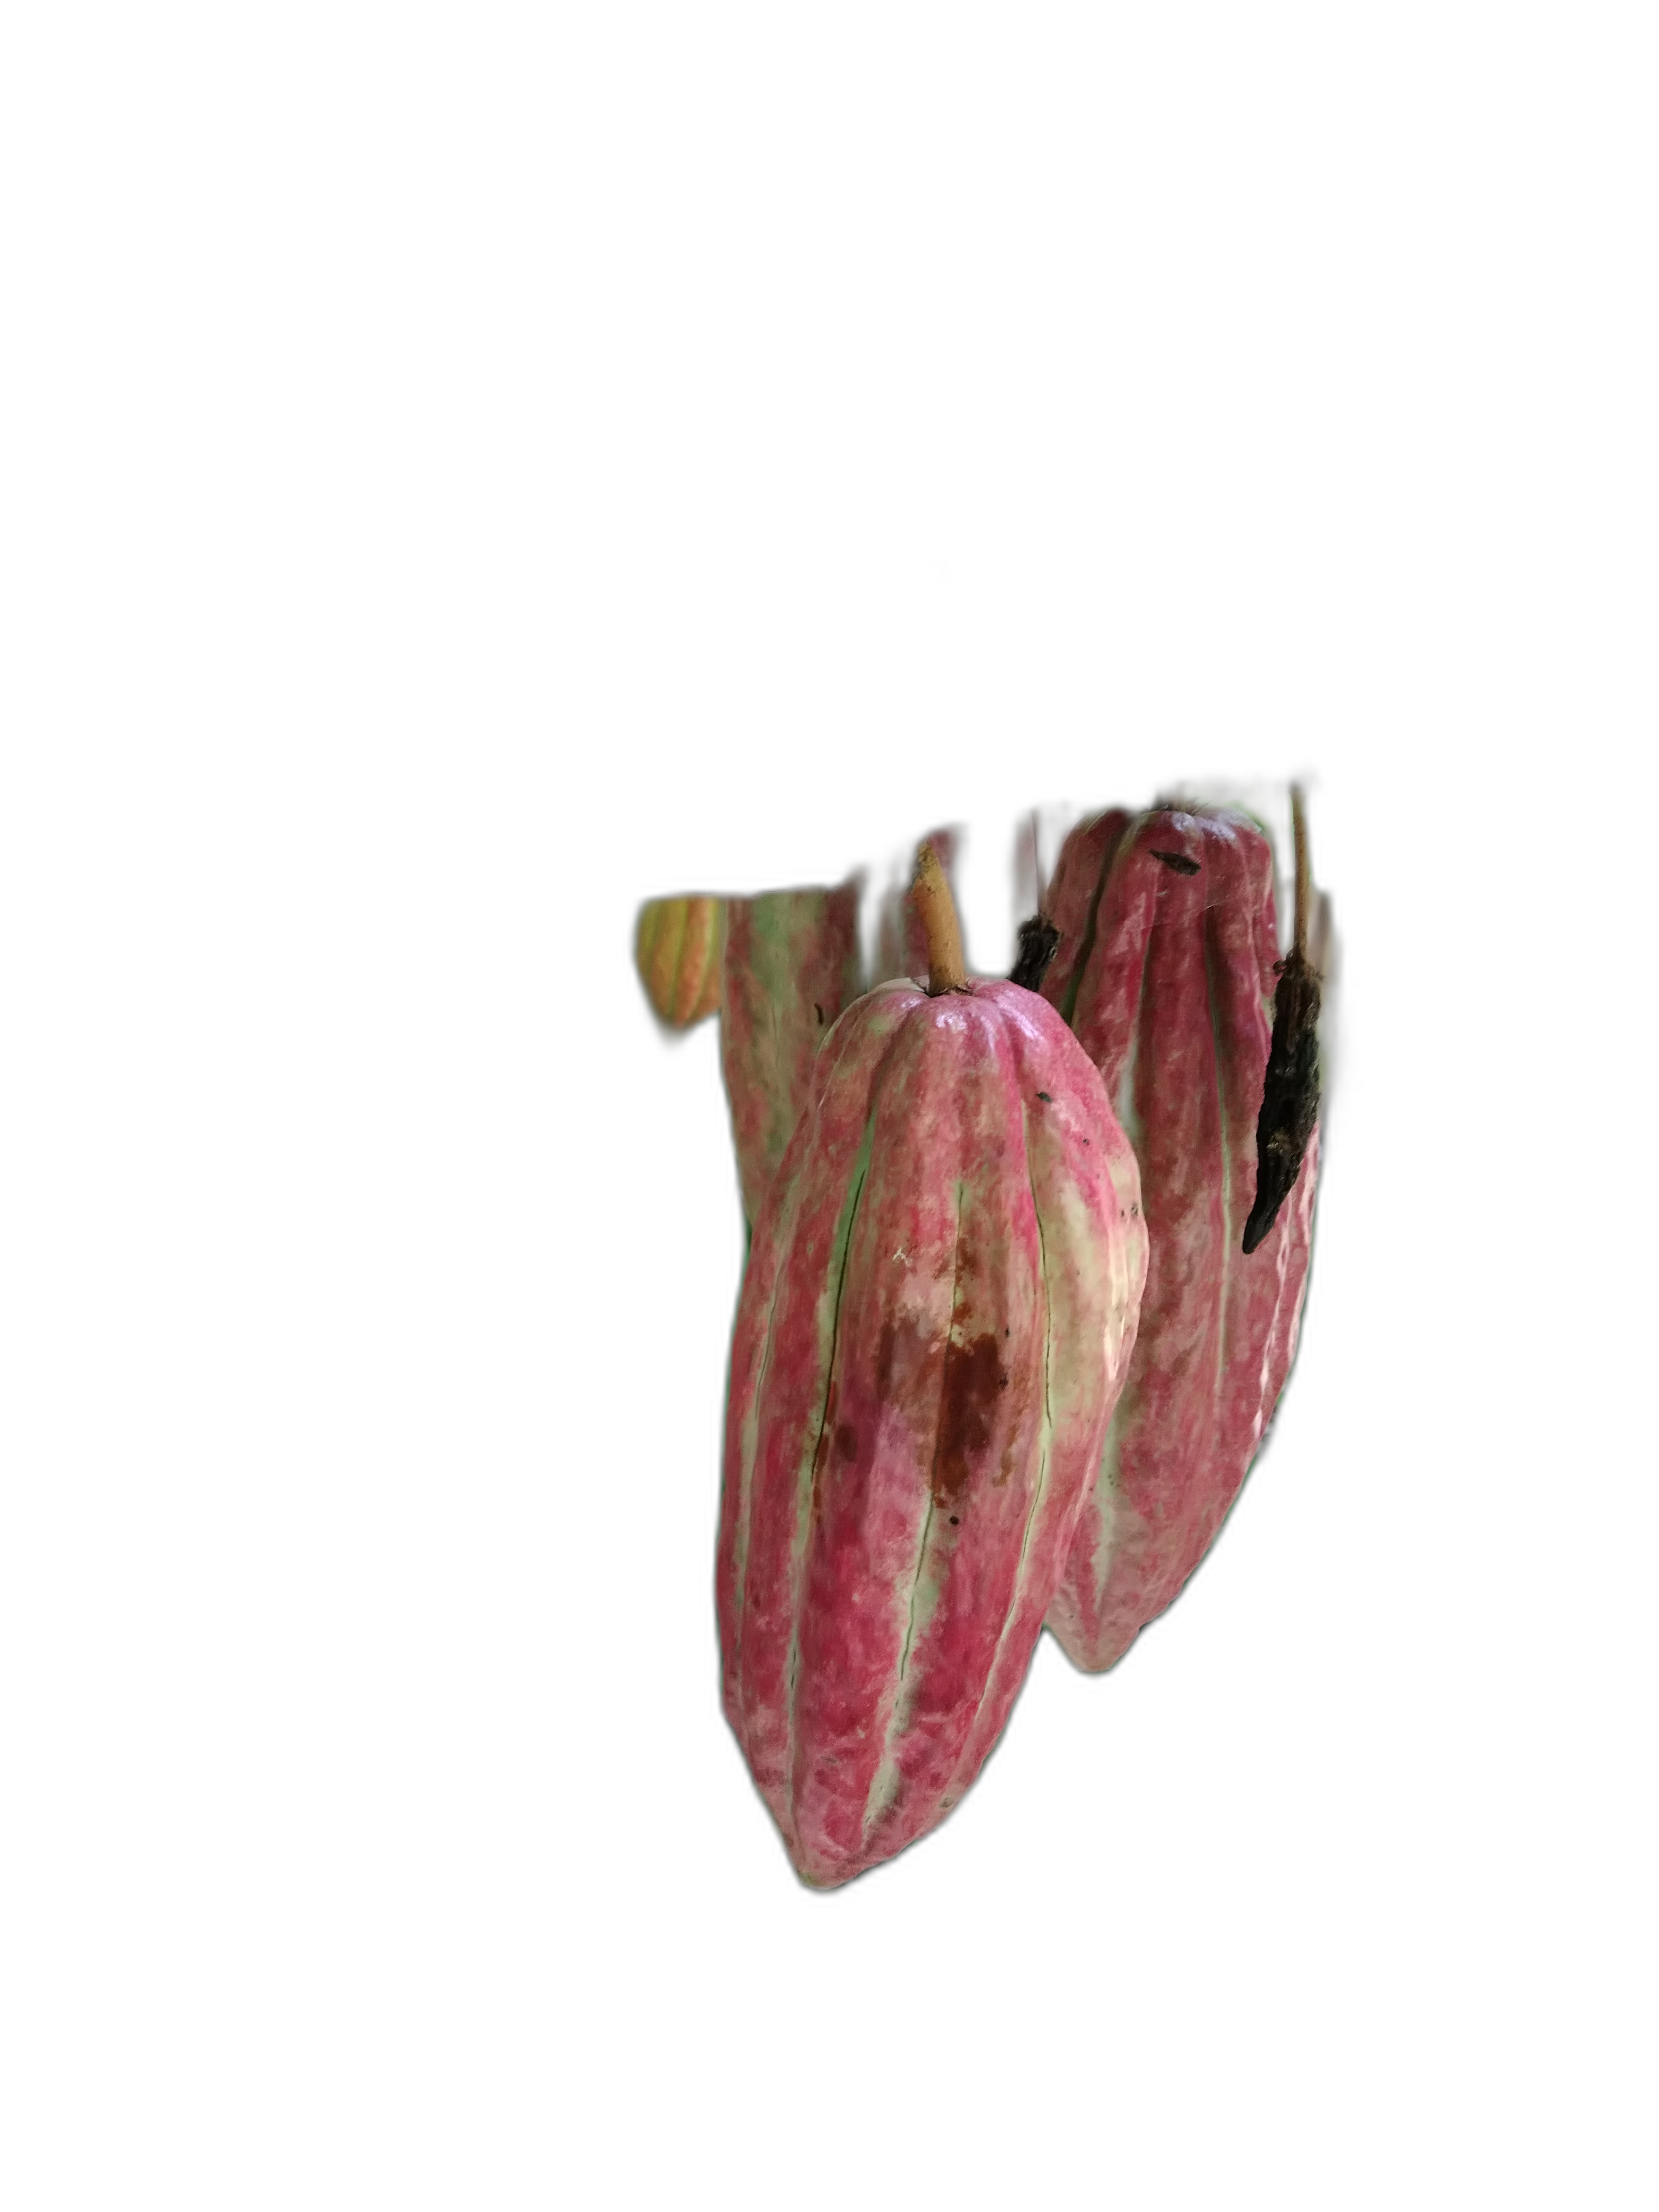

In [4]:
img

In [54]:
x = tf.keras.utils.img_to_array(img)
#x = np.true_divide(x, 255)
x = np.expand_dims(x, axis=0)
print ("preprocess compleated")

preprocess compleated


In [50]:
x.shape

(1, 300, 300, 3)

In [55]:
preds=[]
for model in models:
    individual_preds = model.predict(x)
    individual_preds=individual_preds.tolist()[0]
    preds.append(individual_preds[0]) 

class_pred=np.argmax(np.array(preds))
class_prob=preds[class_pred]

if class_prob<0.5:
    class_pred="Sano"
    class_prob=1-class_prob
elif class_pred==0:
    class_pred="Lasiodiplodia"
elif class_pred==1:
    class_pred="Mazorca Negra"
elif class_pred==2:
    class_pred="Monoliosis"
elif class_pred==3:
    class_pred="Monoliosis"

message=f"{class_pred}"
message

1/1 [==============================] - 0s 14ms/step


'Monoliosis'

In [1]:
from rembg import remove


In [3]:
from rembg import remove
from PIL import Image

input_path = r'C:\Users\USUARIO\Desktop\Tesis\gitrepo\cocoa_dl_android\220128-chihuahua-mb-0853-a252ab.jpg'
output_path = r'C:\Users\USUARIO\Desktop\Tesis\gitrepo\cocoa_dl_android\removed_bg.png'

input = Image.open(input_path)
output = remove(input)
output.save(output_path)

In [20]:
type(output)

PIL.Image.Image

In [2]:
import os, shutil
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import mlflow
import mlflow.tensorflow
from PIL import Image
import re

In [12]:
n_neurons=64
drop_out=0.1
labels=['','']
model = keras.applications.MobileNet(
weights='imagenet',
input_shape=(300, 300, 3),
include_top=False
)
model.trainable = False
inputs = keras.Input(shape=(300, 300, 3))
x = model(inputs, training=False)
#pooling layer 
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(n_neurons, activation = 'softmax')(x)
x = keras.layers.Dropout(drop_out, input_shape=(n_neurons,))(x)
#final dense layer
outputs = keras.layers.Dense(2, activation = 'softmax')(x)
model = keras.Model(inputs,outputs)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy', 
                tf.keras.metrics.Precision(),
                tf.keras.metrics.Recall()])

In [13]:
json_topology=model.to_json()
with open("sample.json", "w") as outfile:
    outfile.write(json_topology)

In [14]:
checkpoint_path=r'C:\Users\USUARIO\Desktop\Tesis\gitrepo\cocoa_dl_android\model_fito.h5'
model.load_weights(checkpoint_path)

In [15]:
Model_json = r"C:\Users\USUARIO\Desktop\Tesis\gitrepo\cocoa_dl_android\sample.json"
Model_weights = r"C:\Users\USUARIO\Desktop\Tesis\gitrepo\cocoa_dl_android\model_fito.h5"

model_json = open(Model_json, 'r')
loaded_model_json = model_json.read()
model_json.close()
model = tf.keras.models.model_from_json(loaded_model_json)
model.load_weights(Model_weights)

In [1]:
import base64

In [19]:
import base64
with open("220128-chihuahua-mb-0853-a252ab.jpg", "rb") as img_file:
    my_string = base64.b64encode(img_file.read())

my_string.is


True

In [2]:
print(my_string)

b'/9j/4Q5gRXhpZgAASUkqAAgAAAATAAABAwABAAAAQBQAAAEBAwABAAAAgA0AAAIBAwADAAAA8gAAAAYBAwABAAAAAgAAAA4BAgAkAAAA+AAAAA8BAgAGAAAAHAEAABABAgAPAAAAIgEAABIBAwABAAAAAQAAABUBAwABAAAAAwAAABoBBQABAAAAMQEAABsBBQABAAAAOQEAACgBAwABAAAAAgAAADEBAgAfAAAAQQEAADIBAgAUAAAAYAEAADsBAgAWAAAAdAEAABMCAwABAAAAAgAAAJiCAgA1AAAAigEAAGmHBAABAAAAwAEAACWIBAABAAAA1AMAAOgDAAAIAAgACABQaG90byBUYWtlbiBJbiBDaGlhbmcgTWFpLCBUaGFpbGFuZABDYW5vbgBDYW5vbiBFT1MgNzAwRACA/AoAECcAAID8CgAQJwAAQWRvYmUgUGhvdG9zaG9wIDIyLjIgKFdpbmRvd3MpADIwMjI6MDE6MjggMDg6NTM6NTgAU3VyYXBvbCBNYW5lZSAvIEV5ZUVtAFN1cmFwb2wgTWFuZWUgKFN1cmFwb2wgTWFuZWUgKFBob3RvZ3JhcGhlcikgLSBbTm9uZV0AAB8AmoIFAAEAAAA6AwAAnYIFAAEAAABCAwAAIogDAAEAAAABAAAAJ4gDAAEAAACQAQAAAJAHAAQAAAAwMjMwA5ACABQAAABKAwAABJACABQAAABeAwAAAZEHAAQAAAABAgMAAZIKAAEAAAByAwAAApIFAAEAAAB6AwAABJIKAAEAAACCAwAABZIFAAEAAACKAwAAB5IDAAEAAAACAAAACZIDAAEAAAAQAAAACpIFAAEAAACSAwAAhpIHAAgAAACaAwAAkJICAAMAAAA5OAAAkZICAAMAAAA5OAAAkpICAAMAAAA5OAAAAKAHAAQAAAAwMTAwAaADAAEAAAABAAAAAqAEAAEAAAAYDwAAA6AEAAEAAAAQCgAABaAEAAEAAAC0Aw

In [2]:
text_file = open("C:/Users/USUARIO/Desktop/Tesis/gitrepo/cocoa_dl_android/img_to_b64.txt", "w")
 
#write string to file
text_file.write(str(my_string))
 
#close file
text_file.close()

In [7]:
from PIL import Image
import numpy as np
import base64
from io import BytesIO

In [13]:
with open("C:/Users/USUARIO/Desktop/Tesis/gitrepo/cocoa_dl_android/Unit_Test/image_for_testing/image1.txt", "r") as file:
    data = file.read()

In [14]:
data

'/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCARpAukDASIAAhEBAxEB/8QAHgAAAgMBAQEBAQEAAAAAAAAABgcEBQgDAgEJAAr/xABfEAABAwIFAQUGAwYDAwcIABcBAgMRBCEABQYSMUEHEyJRYRQycYGRoQgjsRVCwdHh8BZS8SQzkhc0U1RicpMlNTZVc3SCorLSCUNjGDdWlLPC4nWjJidEZGWDhLTD/8QAGwEAAgMBAQEAAAAAAAAAAAAAAwQBAgUABgf/xAArEQADAAICAgMAAgICAwEBAQAAAQIDERIhBDETIkEyUQUUI2EzQnEVgQb/2gAMAwEAAhEDEQA/AMz1rZeowCVbJJE3SAZgccyJ+RwrtQrXlWeusPEBCQFDb4hBkWPy4wX1WqGk1ncsBtYizRMC5vAHHQ89cCXahTITXZdUId/IqWTCidvi3C32++MjBi0jP8XD1yDSny5mn0c9mVMvu0svJQWEjcTuiTa9p+2ILairx7kySEpUojcLQBfjkD54g6Hfdco1Uk7m3ikLTISDBPP99MNih0dSjKQ8Sguq2K7t2EbASOIN4sfPCubG0+gflRxpNCkcyFO4utBbKlLmUuAAmeCT8rYLaXLaippkPrecSE/9iBtmwkx5dPri/c0rT07i1oBJXYpUQUoSJgi3MEY8U9C62Q1DYWQQPS58x/c4TrCqXZm1kYPZllKFUrgdT36QABIJBBBE8HqBY4p8nyZCXgpx5ynV4fE2gEx5RI8/PjBjVZe+93ilhxJ3eFCiJO0k8gT14/7OO1PkhsACUmxURc/LDOH/AI+guLy

In [15]:
img_string=str(data)
im_bytes = base64.b64decode(img_string)   # im_bytes is a binary image
im_file = BytesIO(im_bytes)  # convert image to file-like object

In [16]:
im_file

In [16]:
img = Image.open(im_file)   # img is now PIL Image object
img = img.resize((300, 300))
img=img.rotate(90)



In [13]:
test_img=remove(img)

In [15]:
type(test_img)

PIL.Image.Image

In [17]:
img.show()

In [5]:
type(img)

PIL.Image.Image

In [1]:
import tensorflow as tf

In [10]:
try:
    x = tf.keras.utils.img_to_array(img)
    # x = np.true_divide(x, 255)
    x = np.expand_dims(x, axis=0)
except Exception as e:
    print(f"Exception preprocessing img: {e}" )

In [19]:
MODEL_PATH=r"C:\Users\USUARIO\Desktop\Tesis\gitrepo\cocoa_dl_android\FlaskWebService2\src"
# Load Model
#==============================================================================

Model_json = MODEL_PATH+"/model.json"
Model_weights = MODEL_PATH+"/model.h5"

model_json = open(Model_json, 'r')
loaded_model_json = model_json.read()
model_json.close()
model = tf.keras.models.model_from_json(loaded_model_json)
model.load_weights(Model_weights)

NameError: name 'tf' is not defined

In [14]:
from flask import Flask, jsonify

ModuleNotFoundError: No module named 'click'

In [15]:
try:
    preds = model.predict(x)
    preds=preds.tolist()[0]
    
    if preds[0]==1:
        class_pred="Cat"
    elif preds[1]==1:
        class_pred="Dog"
    print(str(class_pred))
except Exception as e:
    print(f"Exception making predictions img: {e}" )

1/1 [==============================] - 6s 6s/step
Exception making predictions img: name 'class_pred' is not defined


In [17]:
type(preds)

list

In [18]:
np.argmax(np.array(preds))

0